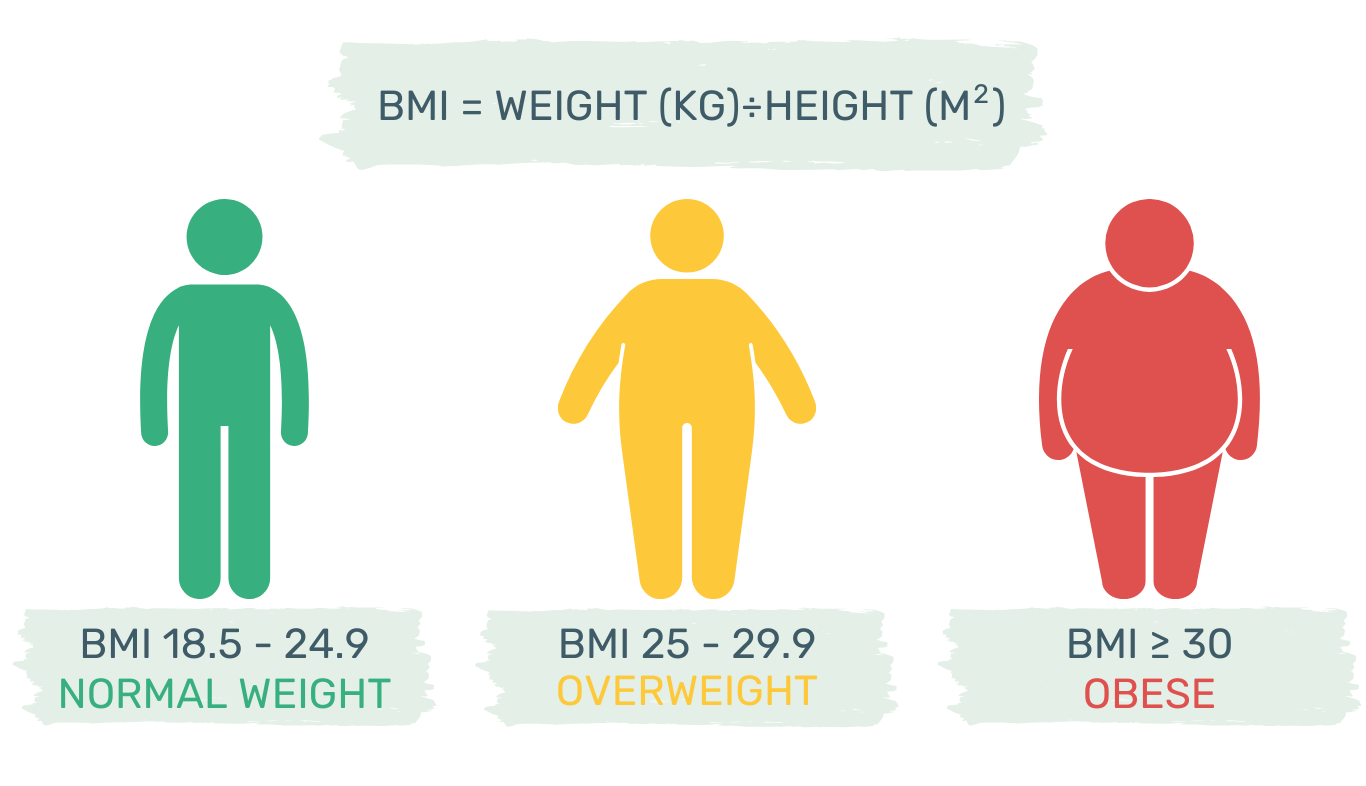

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Import Libraries**

In [36]:
data = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

# **EDA**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [38]:
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

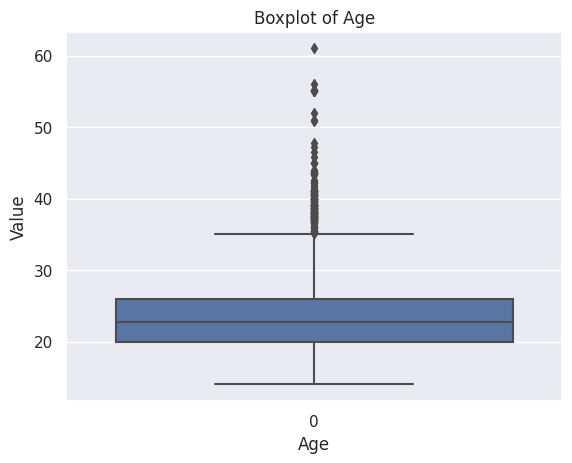

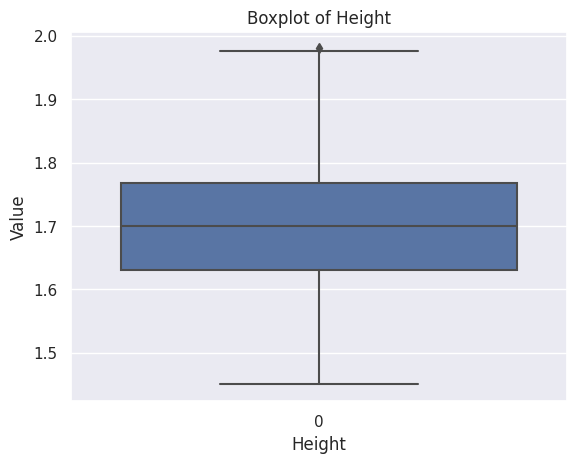

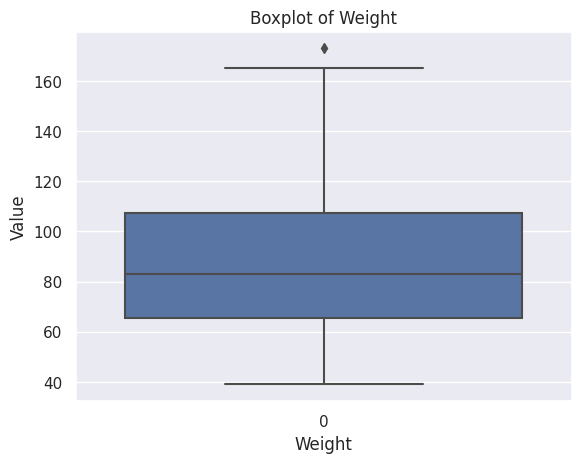

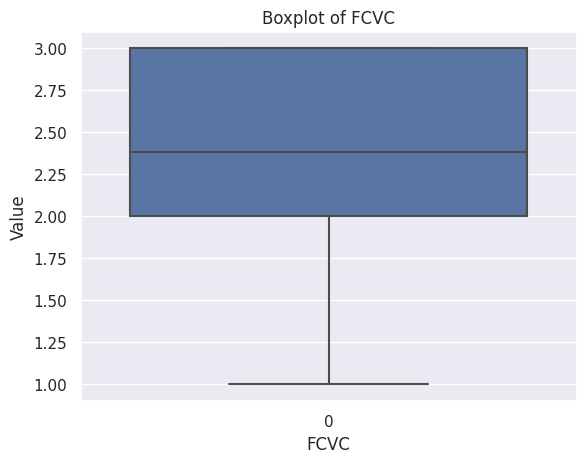

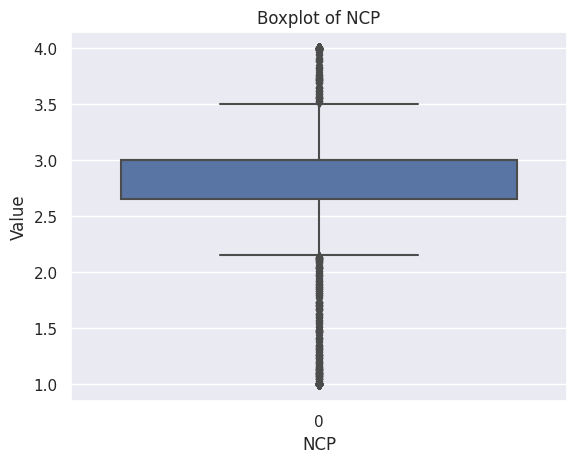

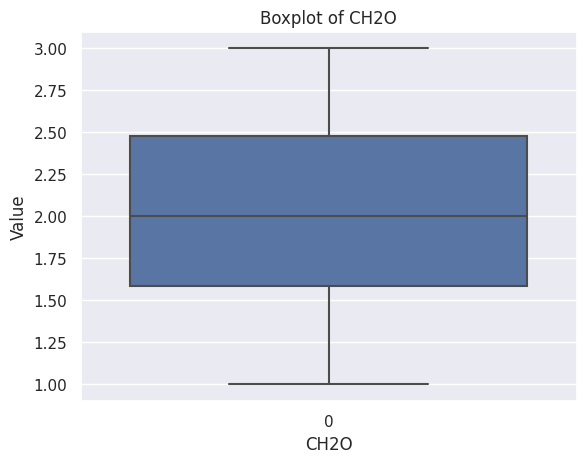

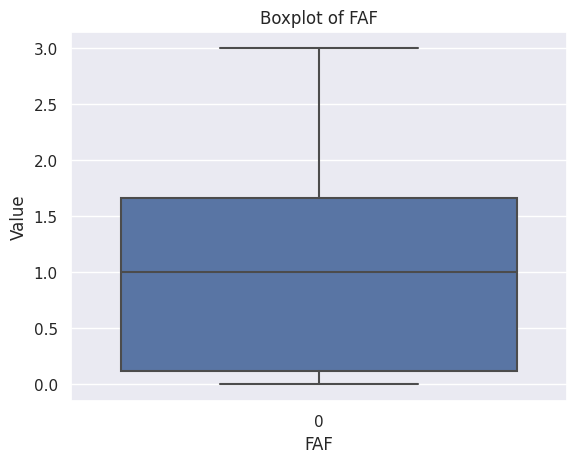

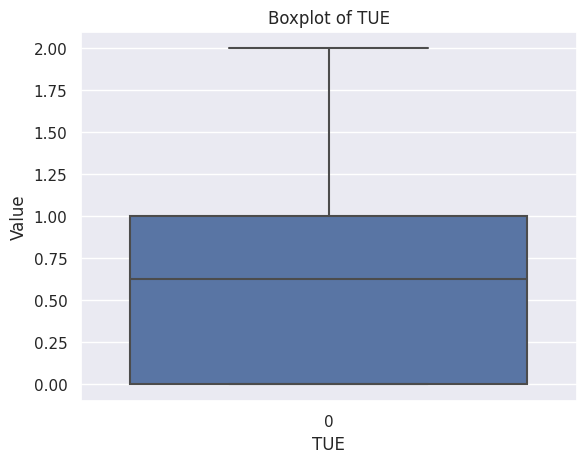

In [39]:
data_col = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
for col in data_col:
    sns.boxplot(data[col] )
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()

In [40]:
data.describe(include="object")

Gender       CALC  FAVC   SCC SMOKE family_history_with_overweight  \
count    2111       2111  2111  2111  2111                           2111   
unique      2          4     2     2     2                              2   
top      Male  Sometimes   yes    no    no                            yes   
freq     1068       1401  1866  2015  2067                           1726   

             CAEC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1765                   1580             351

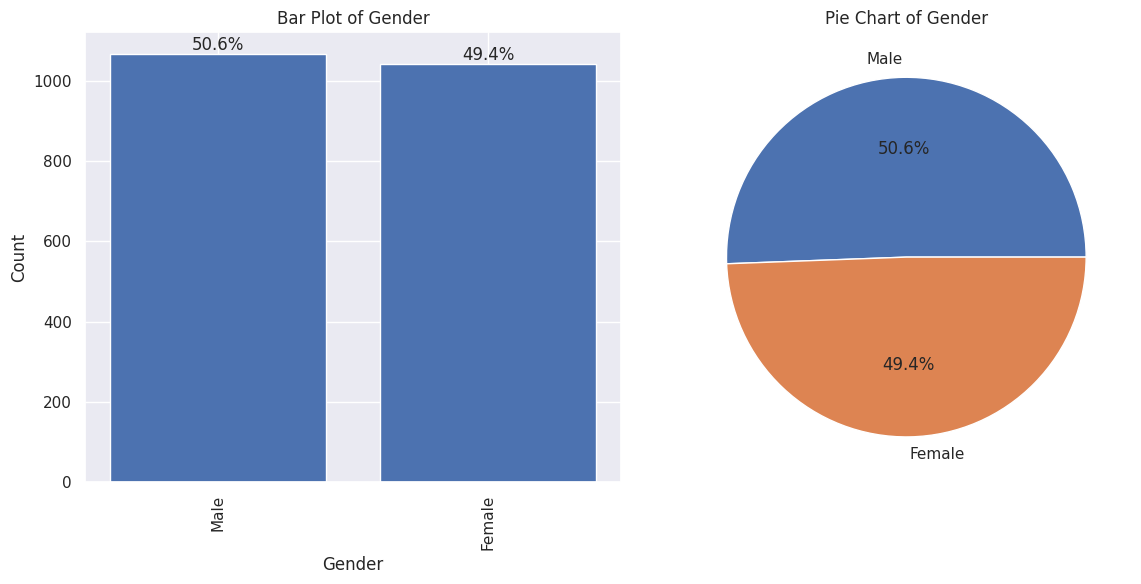

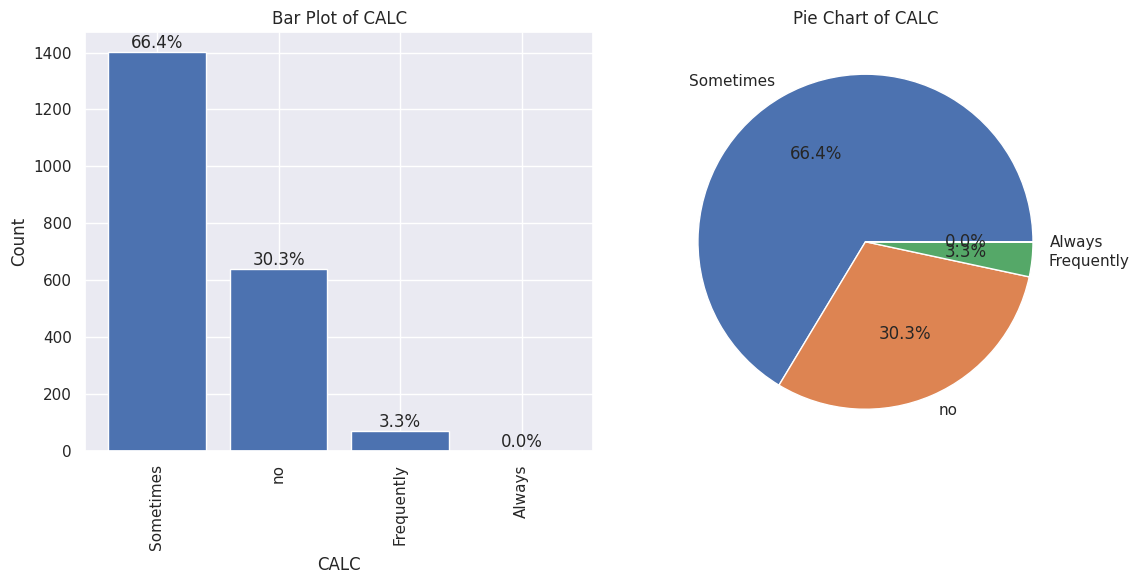

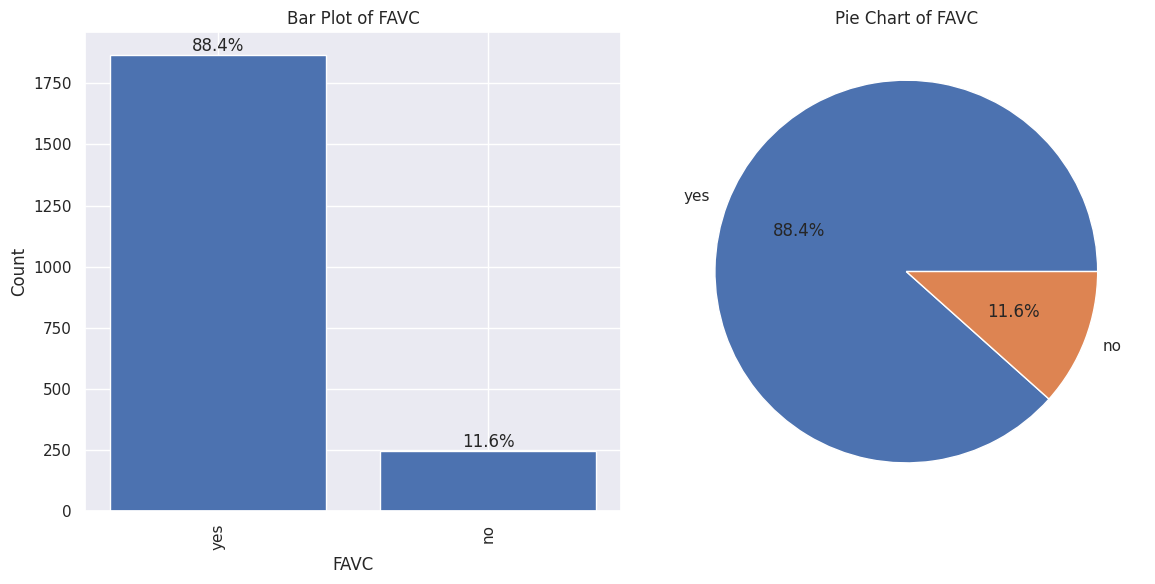

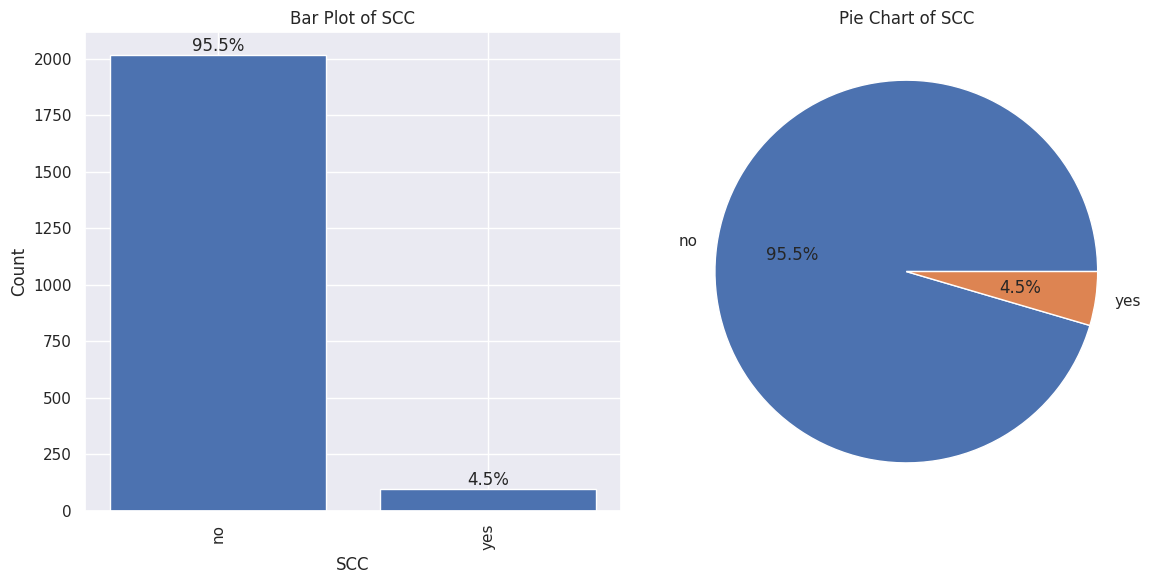

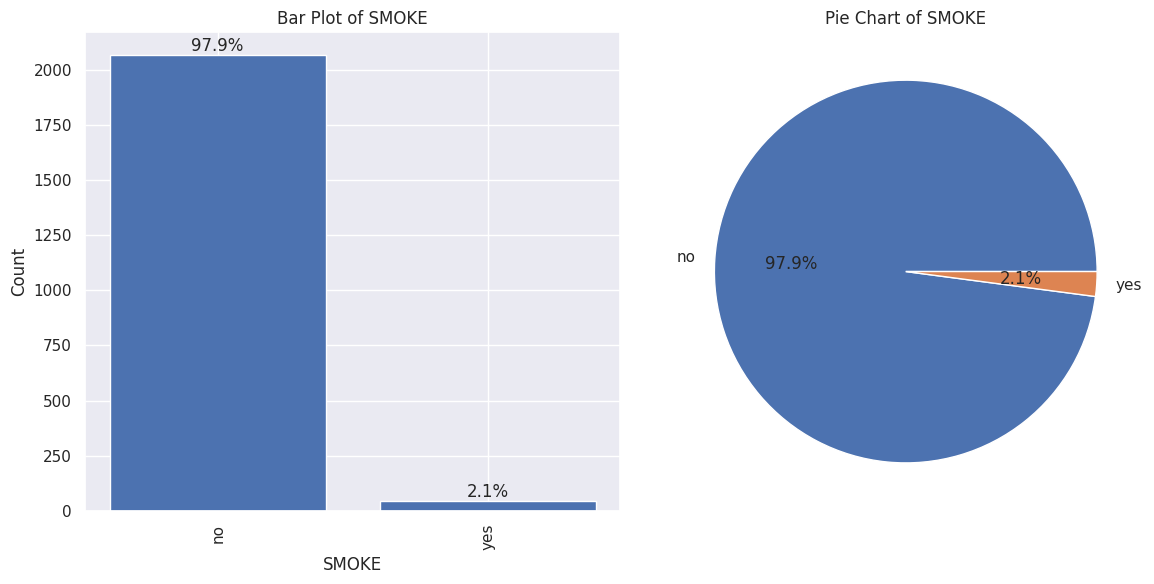

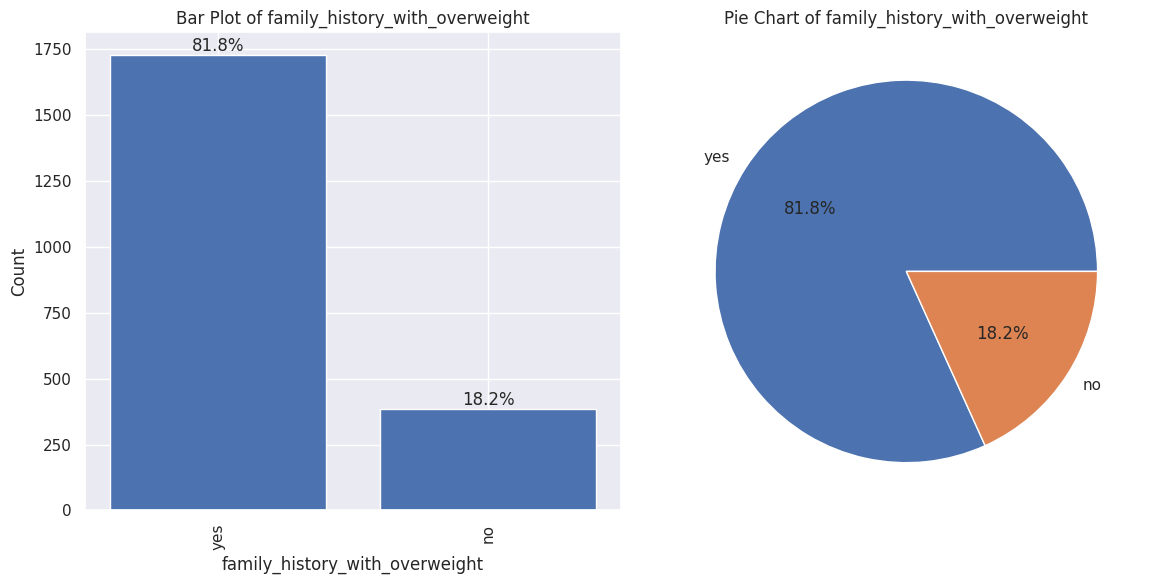

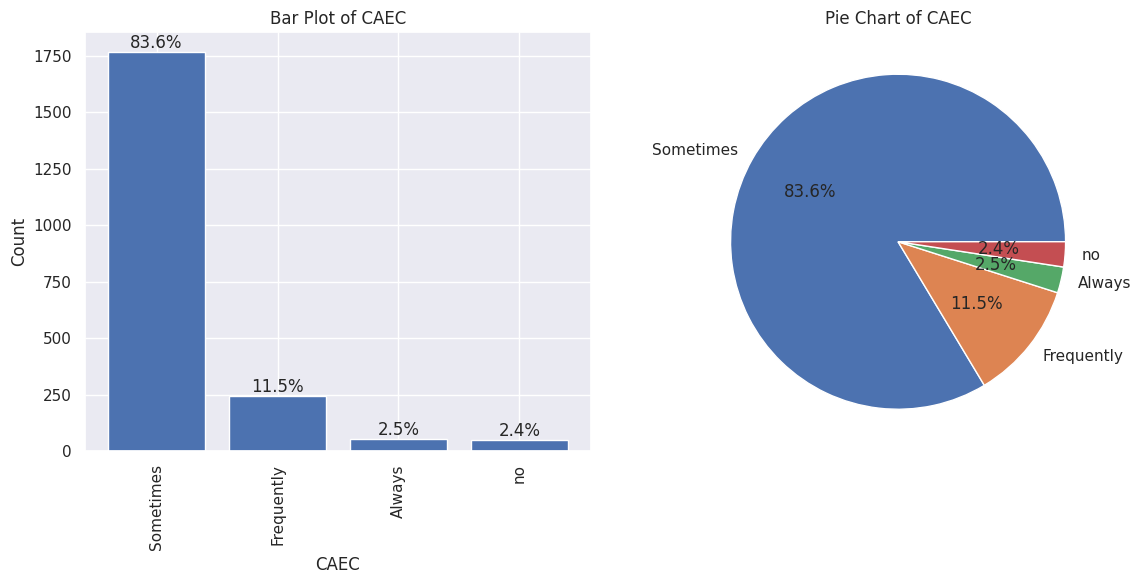

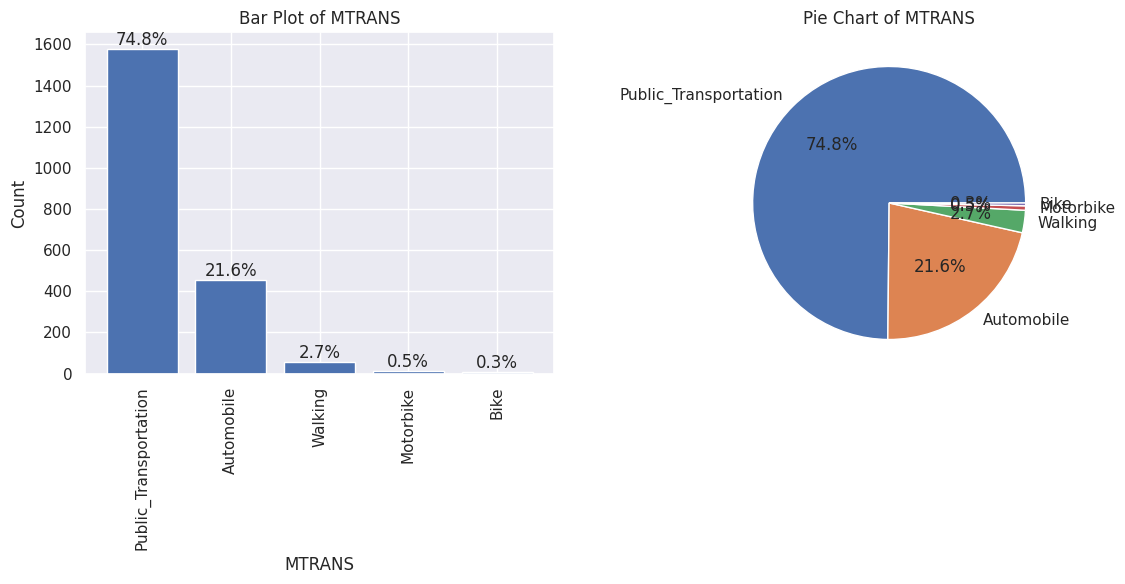

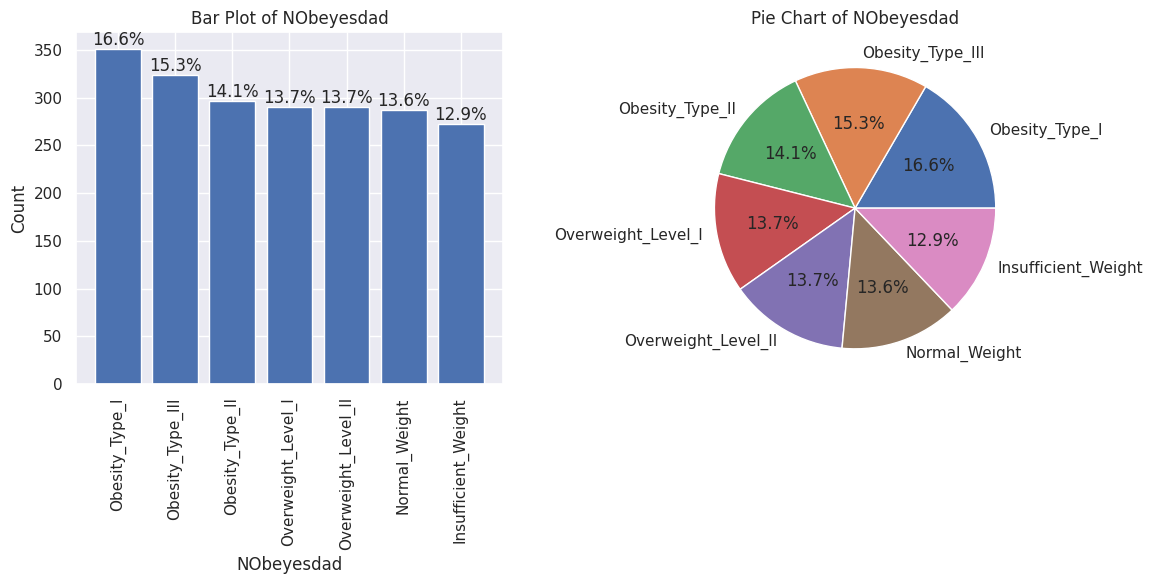

In [41]:
data_object = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in data_object:
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    value_counts = data[col].value_counts()
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    
    # Add percentage above bars
    total = value_counts.sum()
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{(height/total)*100:.1f}%', ha='center', va='bottom')

    # Pie plot
    plt.subplot(1, 2, 2)
    plt.pie(labels=value_counts.index, x=value_counts.values, autopct='%1.1f%%')
    plt.title(f"Pie Chart of {col}")

    plt.tight_layout()
    plt.show()


In [42]:
for i in data.columns:
    print(f"The value_counts of {i} \n {data[i].value_counts()}\n")
    print("_______________________________________________________________\n")

The value_counts of Age 
 Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

_______________________________________________________________

The value_counts of Gender 
 Gender
Male      1068
Female    1043
Name: count, dtype: int64

_______________________________________________________________

The value_counts of Height 
 Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64

_______________________________________________________________

The value_counts of Weight 
 Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.47

In [43]:
data.duplicated().sum()

24

In [44]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [45]:
data.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

__________________________________________________________The Age ________________________________________________________________



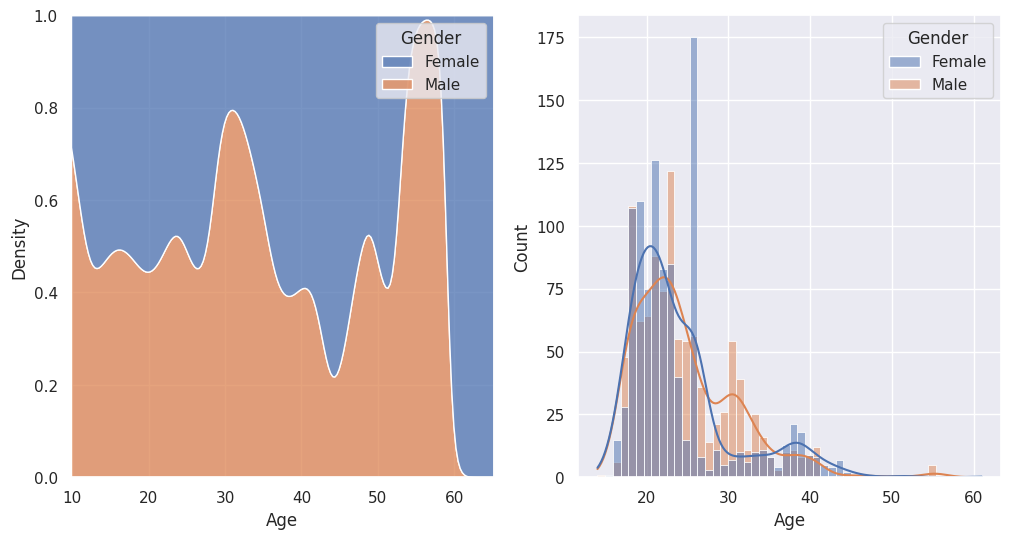

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


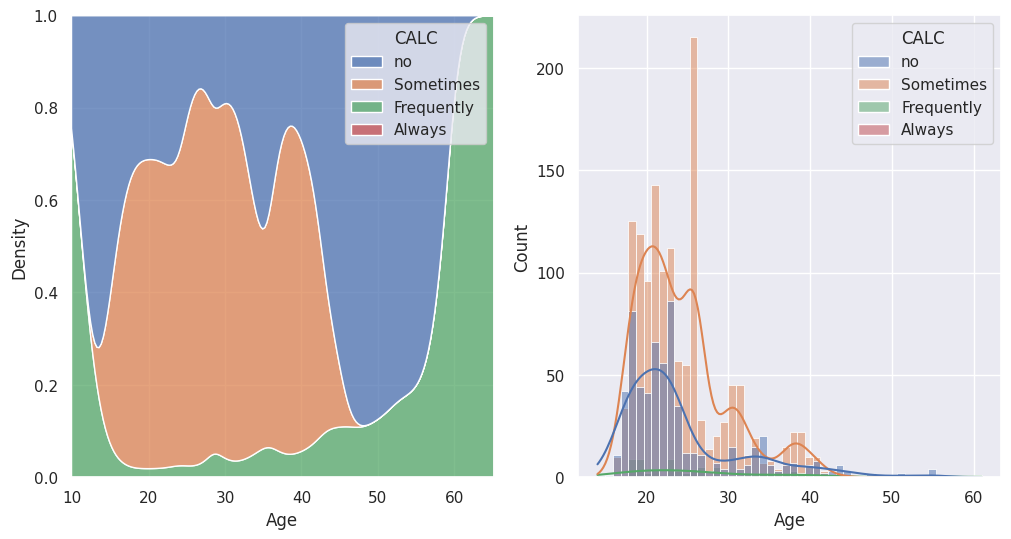

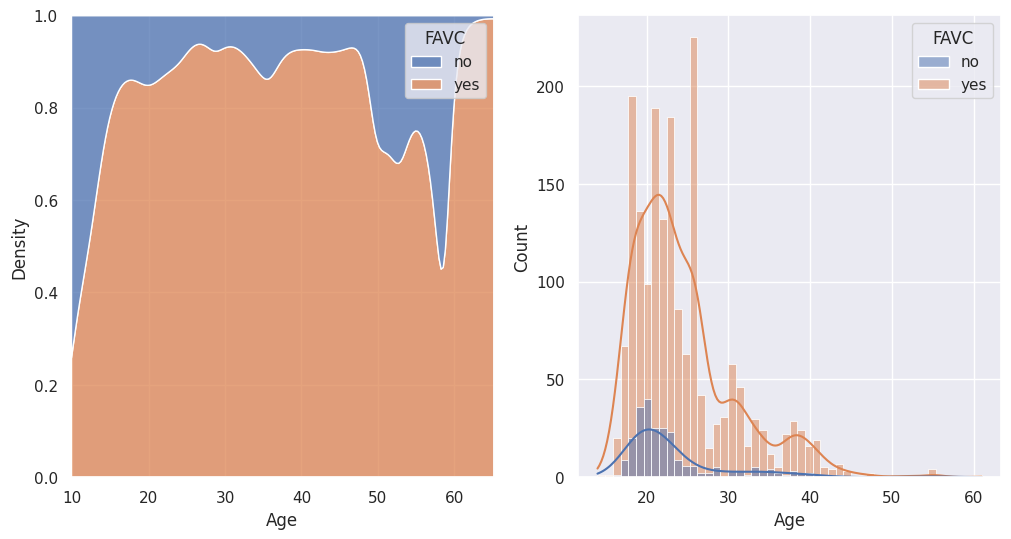

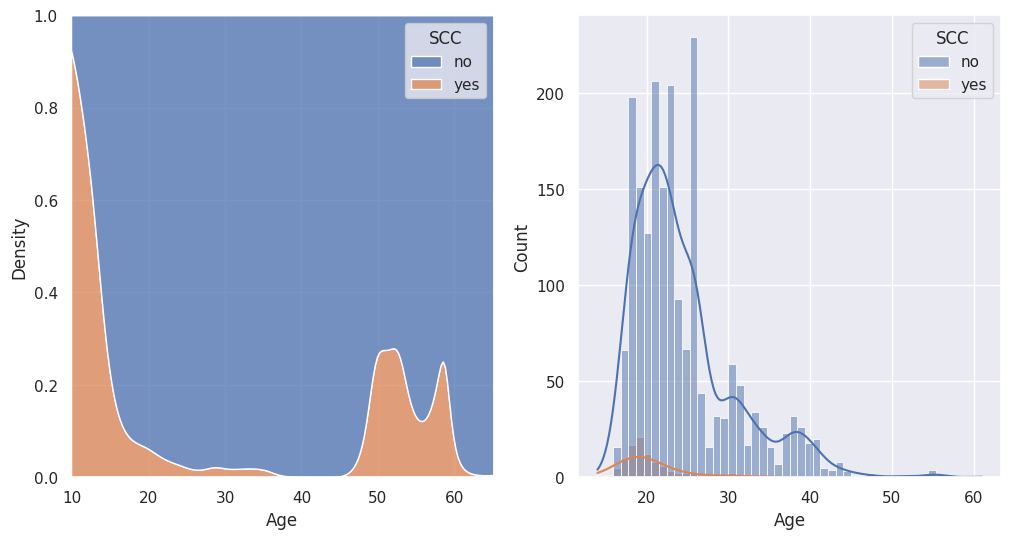

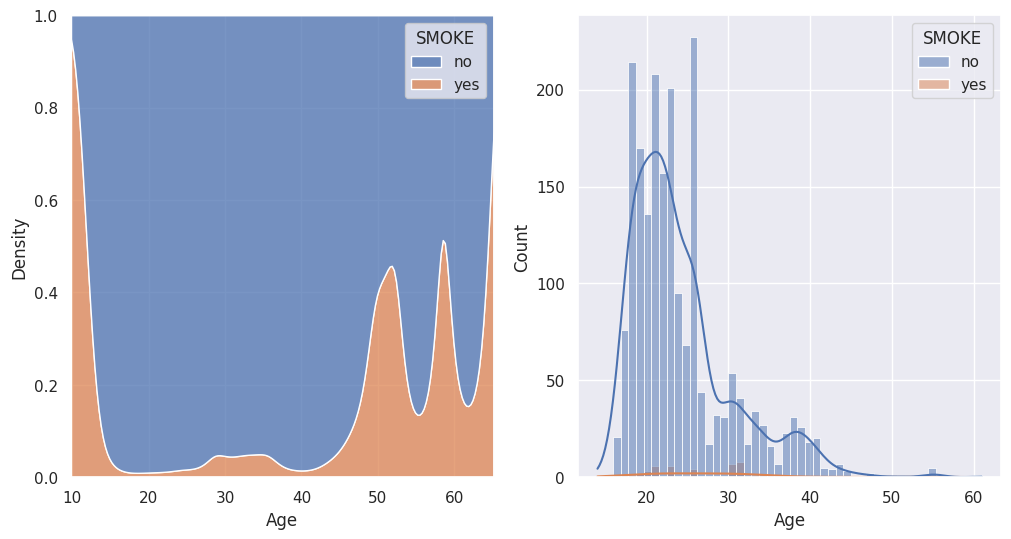

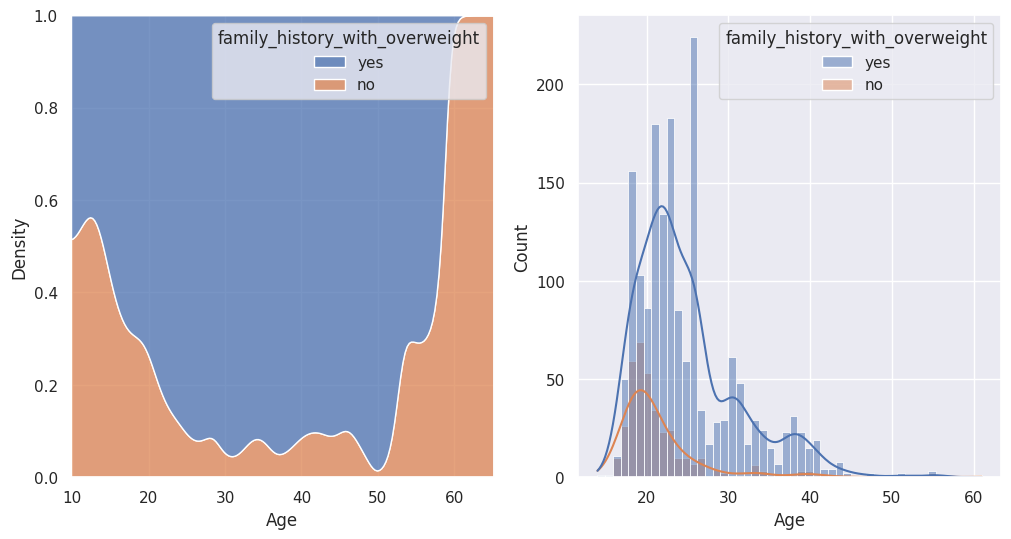

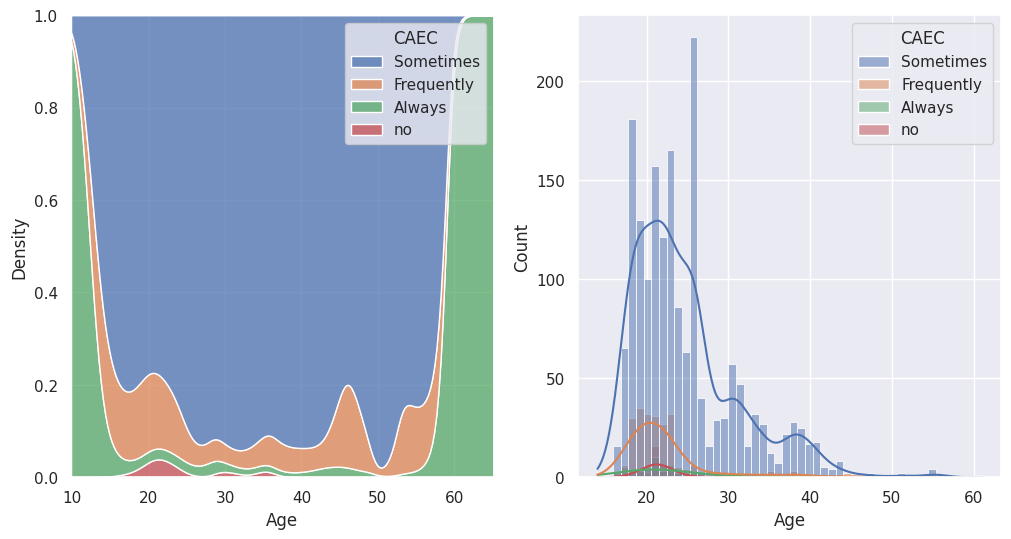

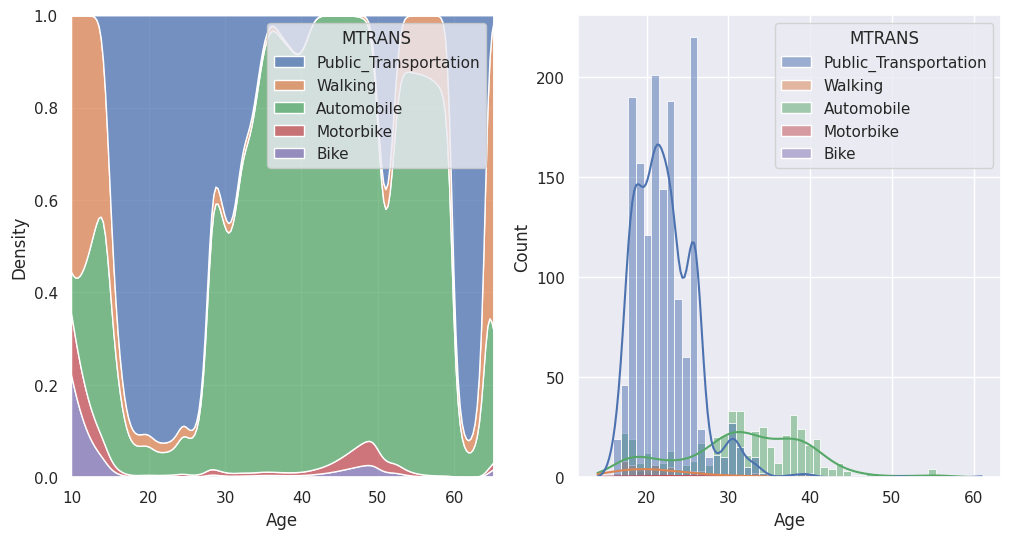

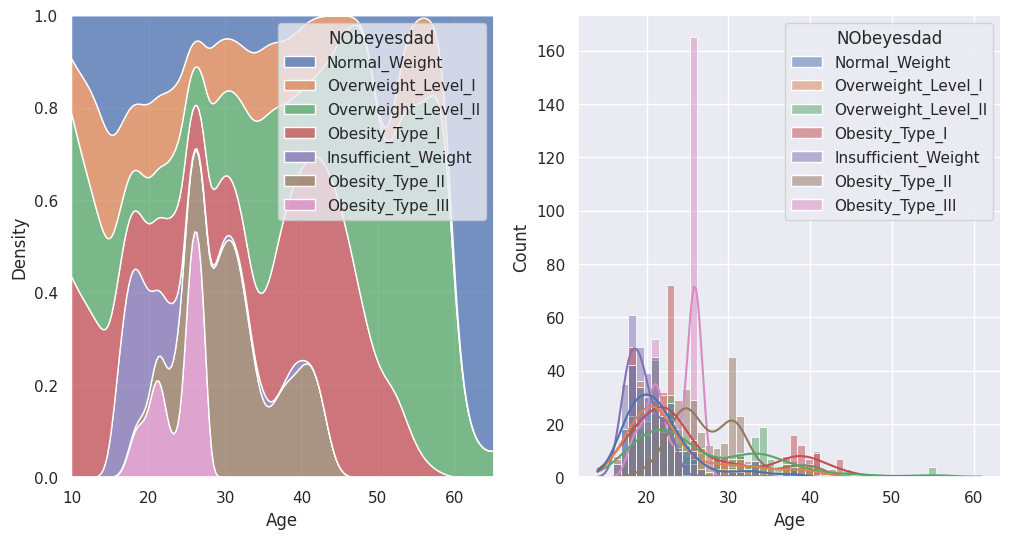


__________________________________________________________The Height ________________________________________________________________



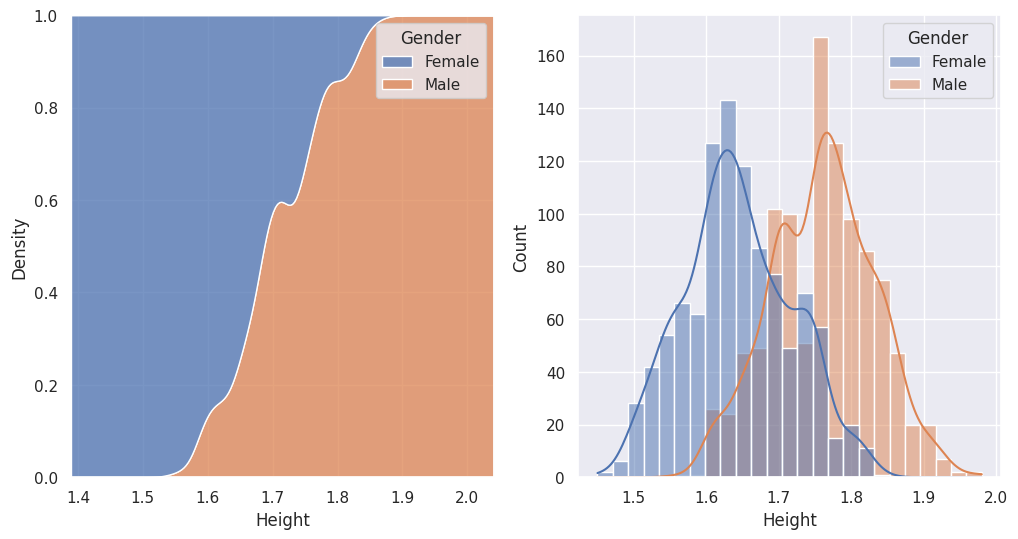

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


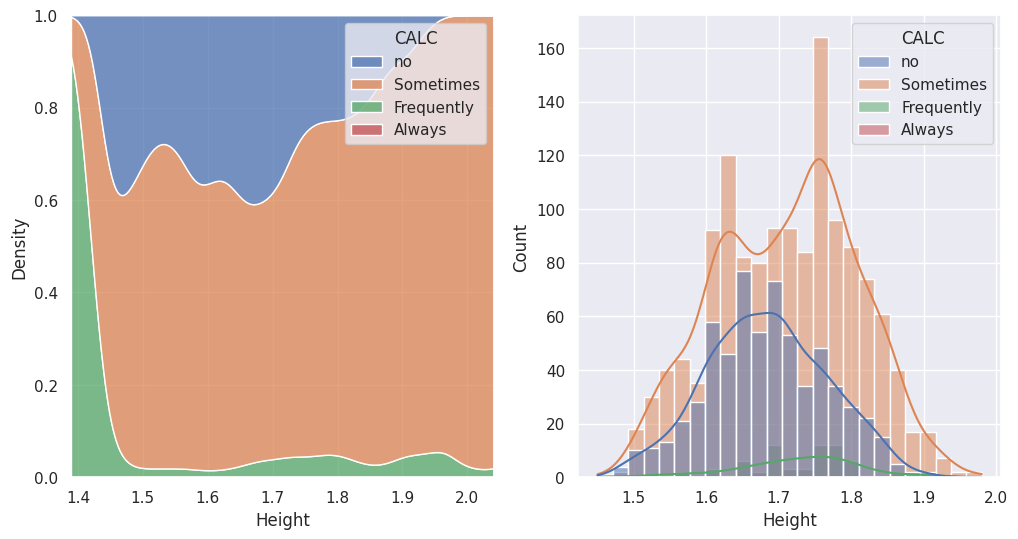

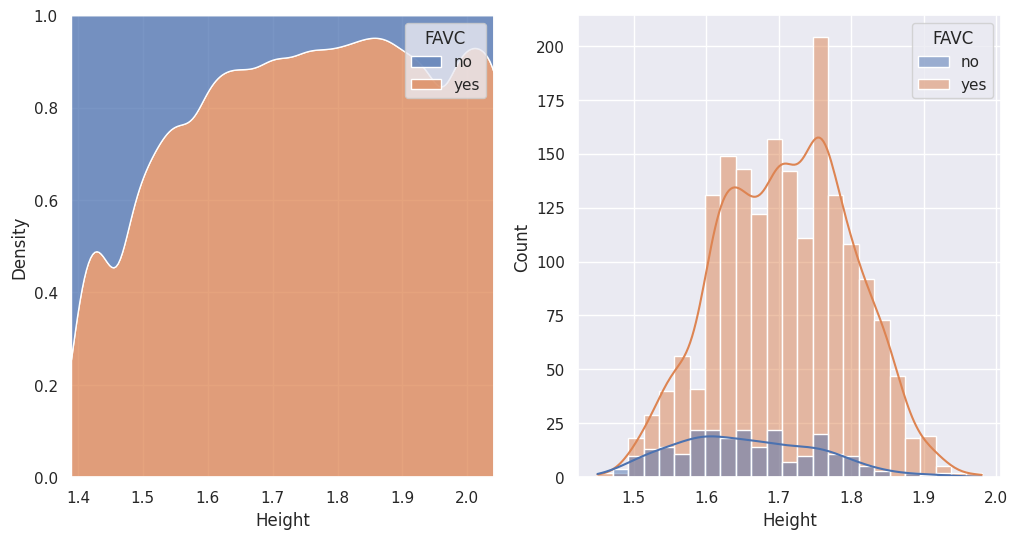

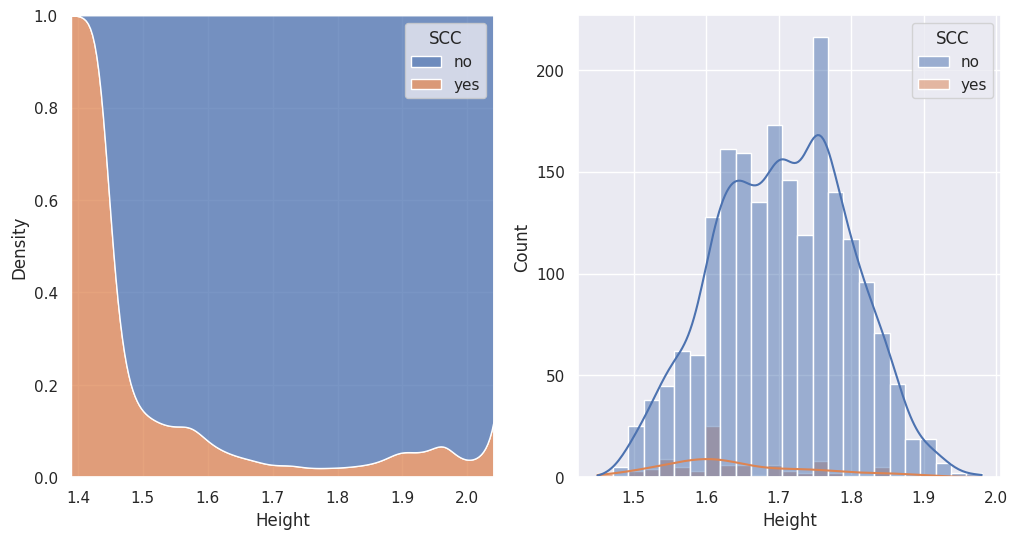

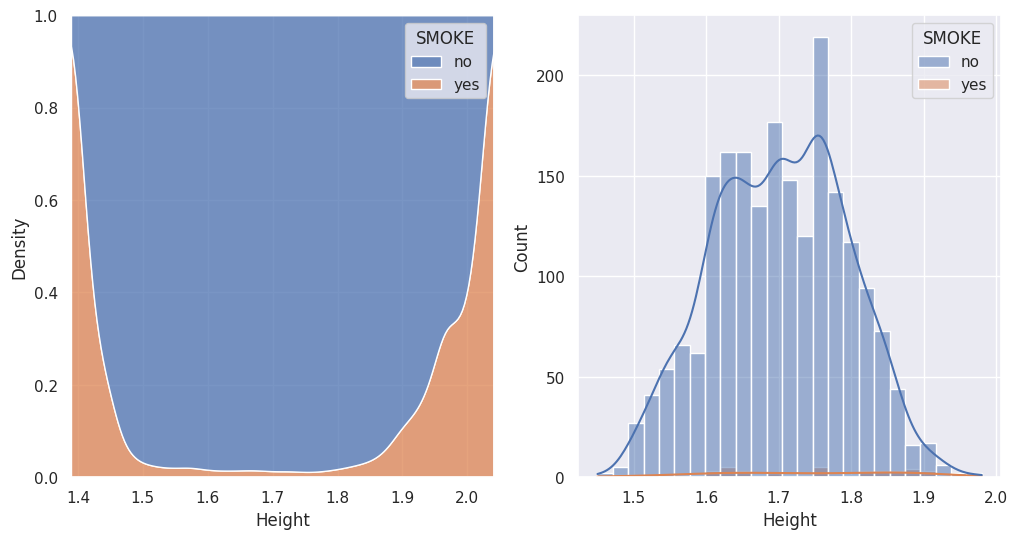

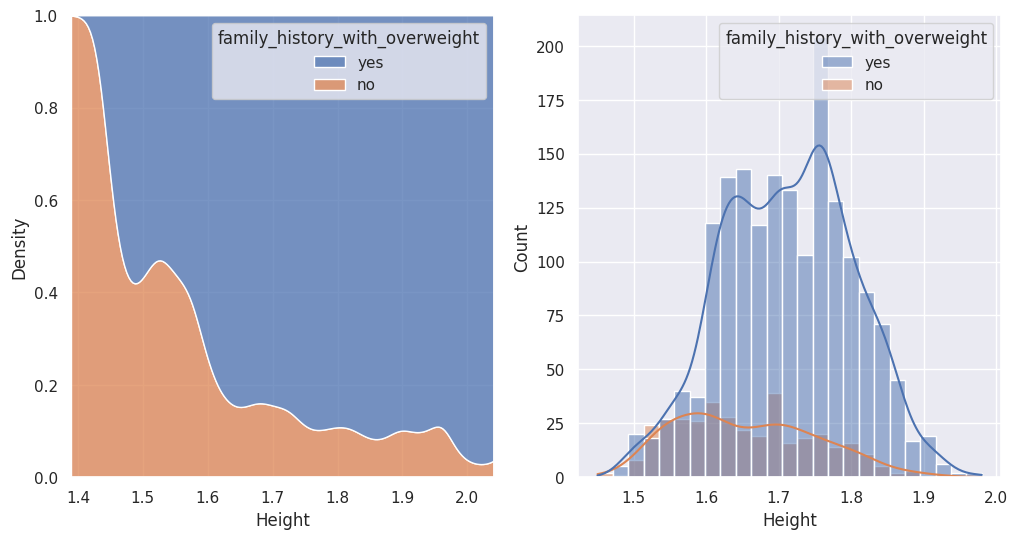

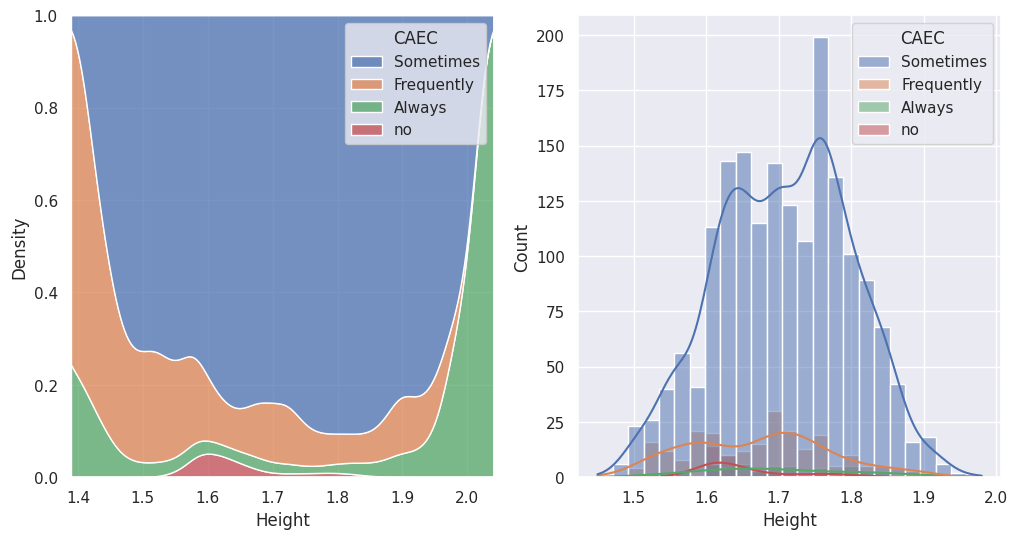

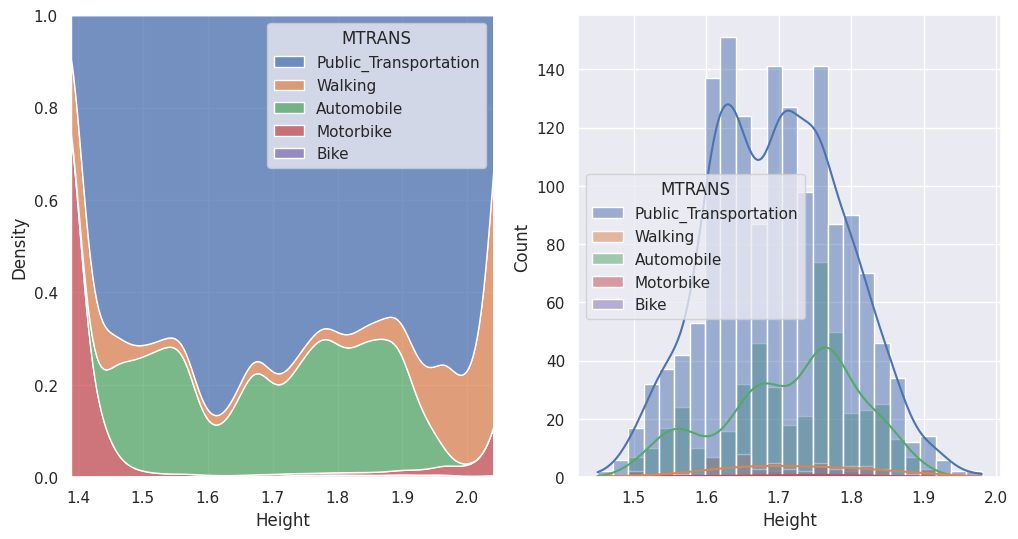

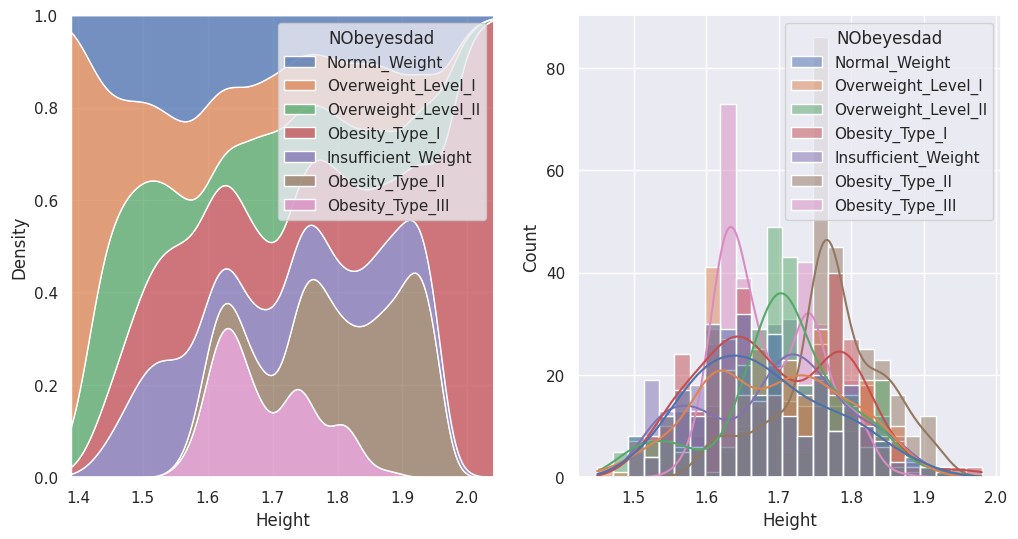


__________________________________________________________The Weight ________________________________________________________________



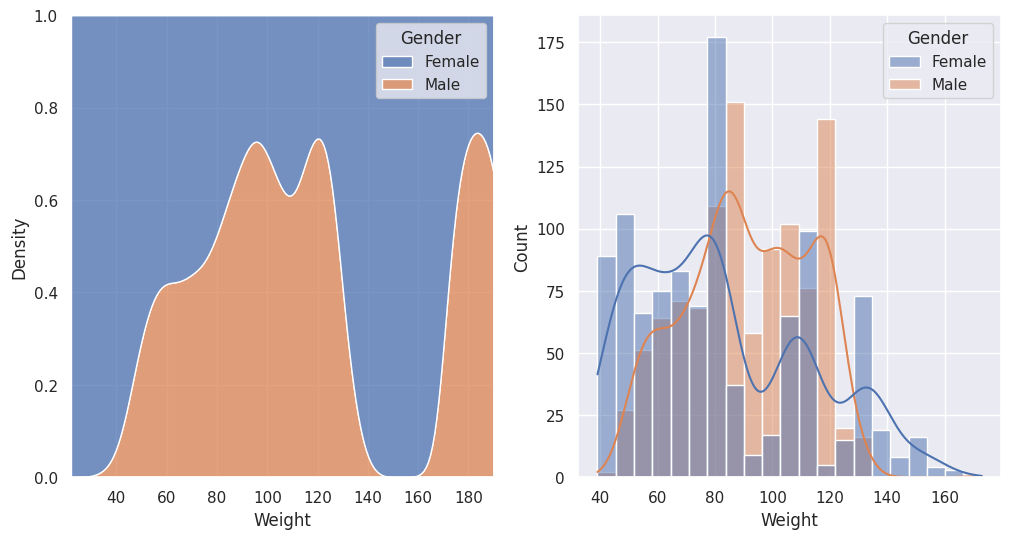

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


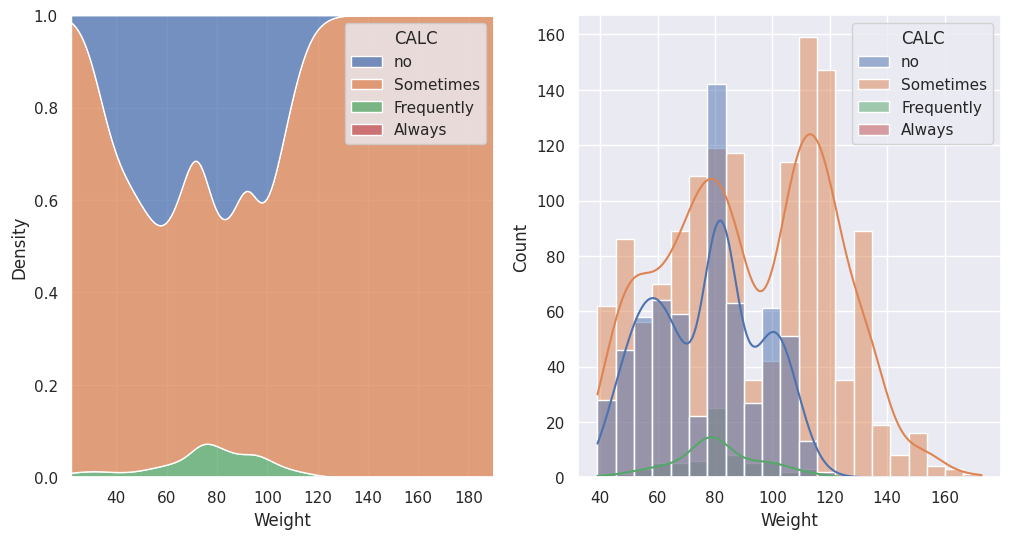

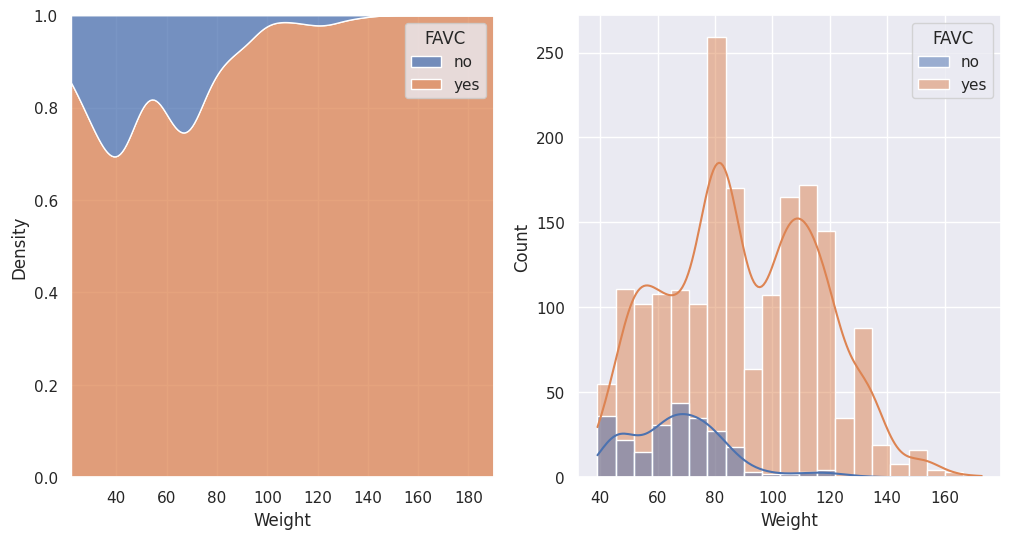

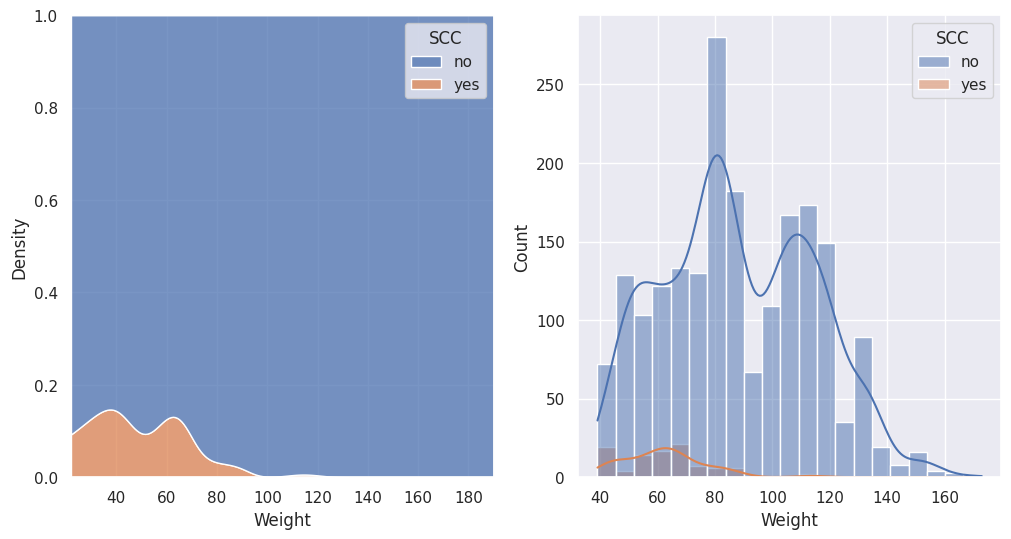

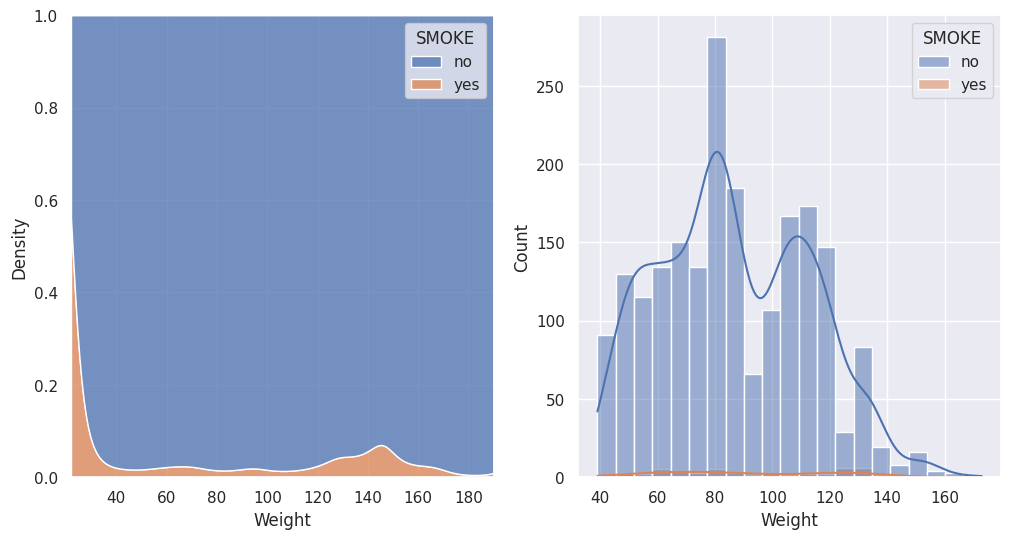

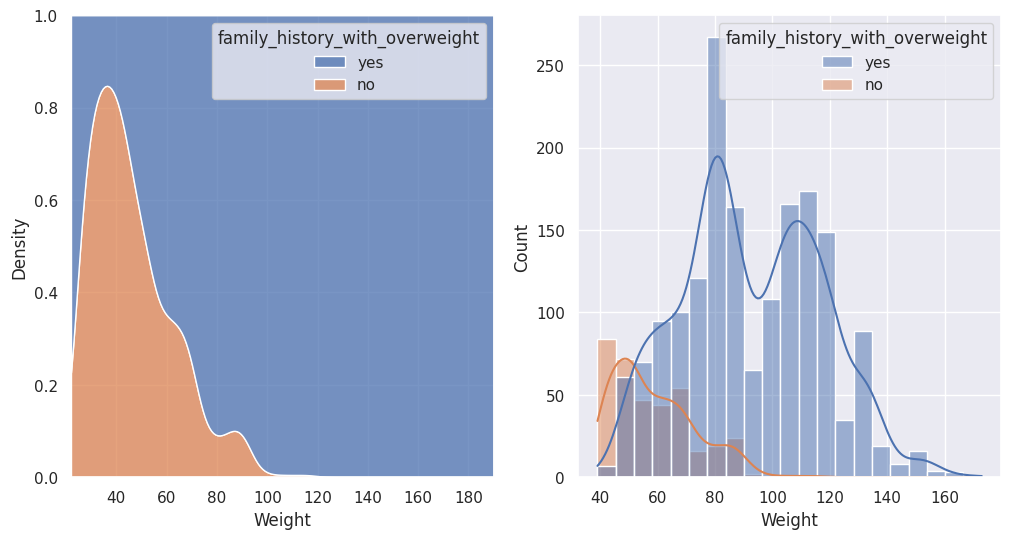

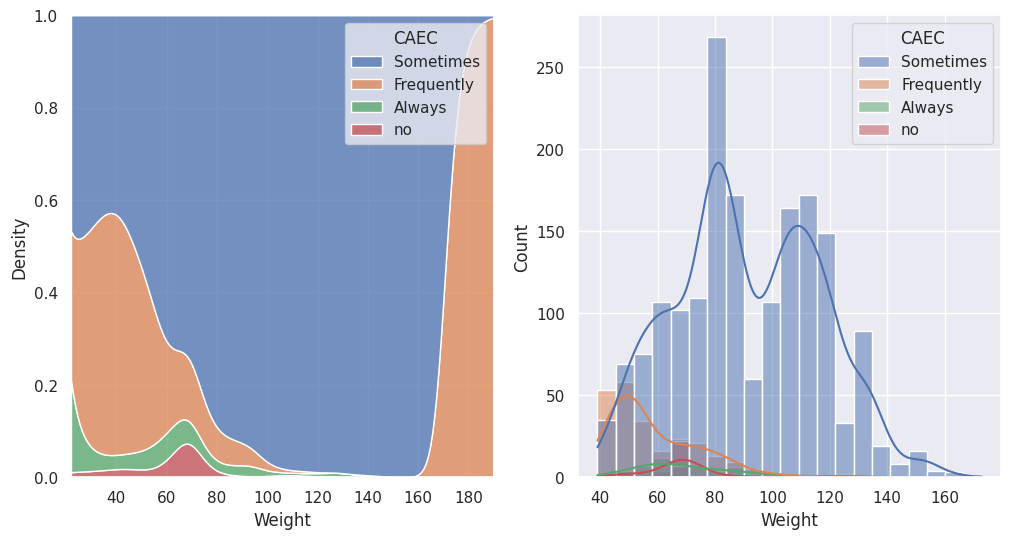

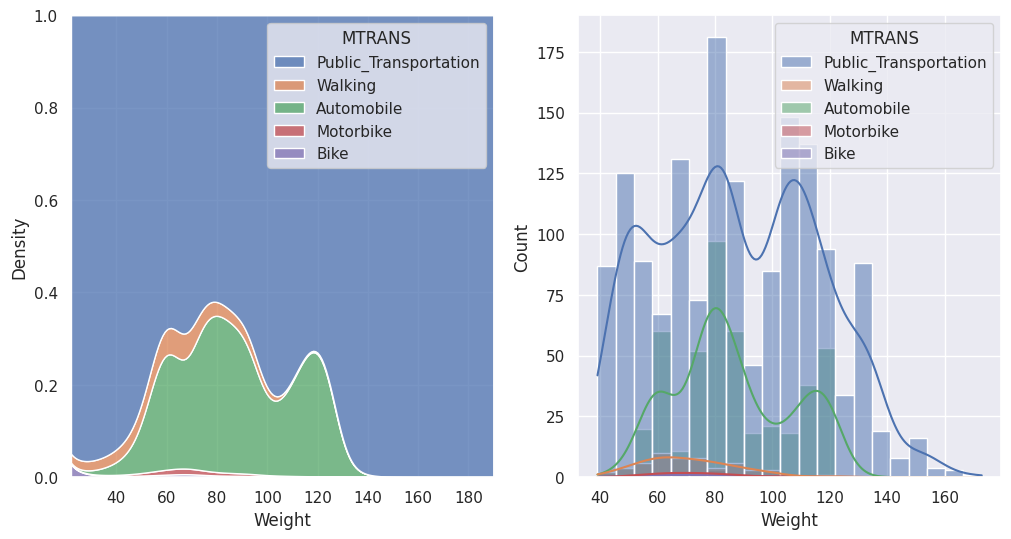

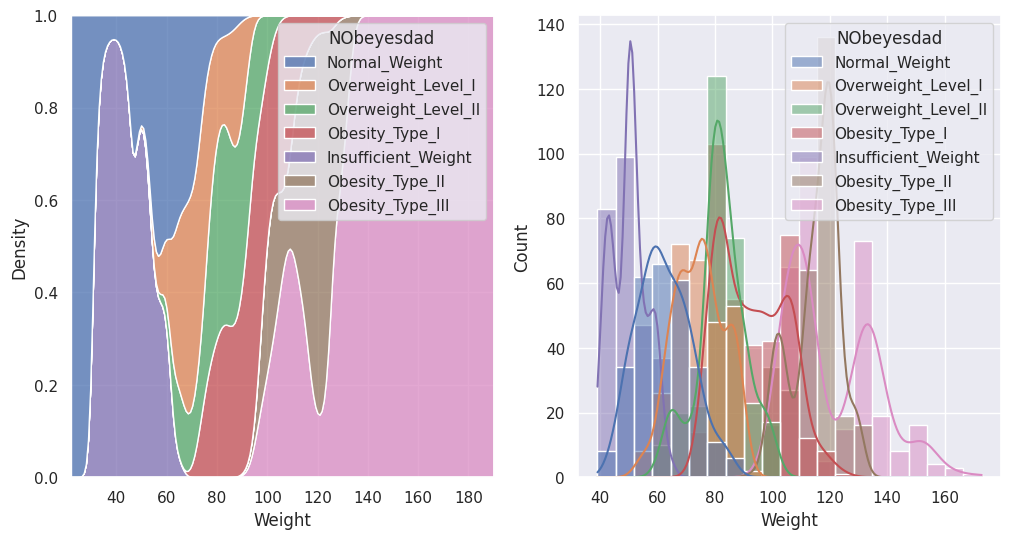


__________________________________________________________The FCVC ________________________________________________________________



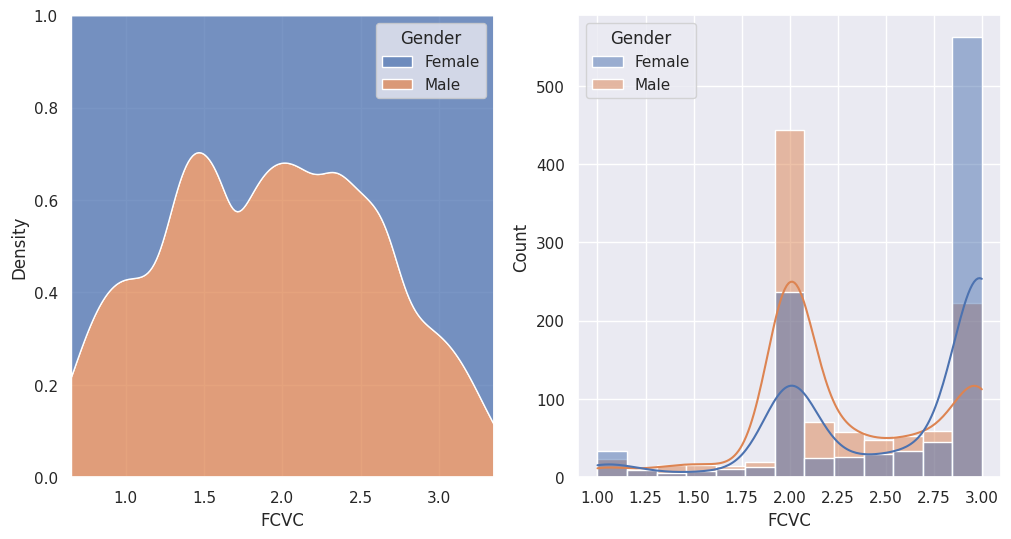

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


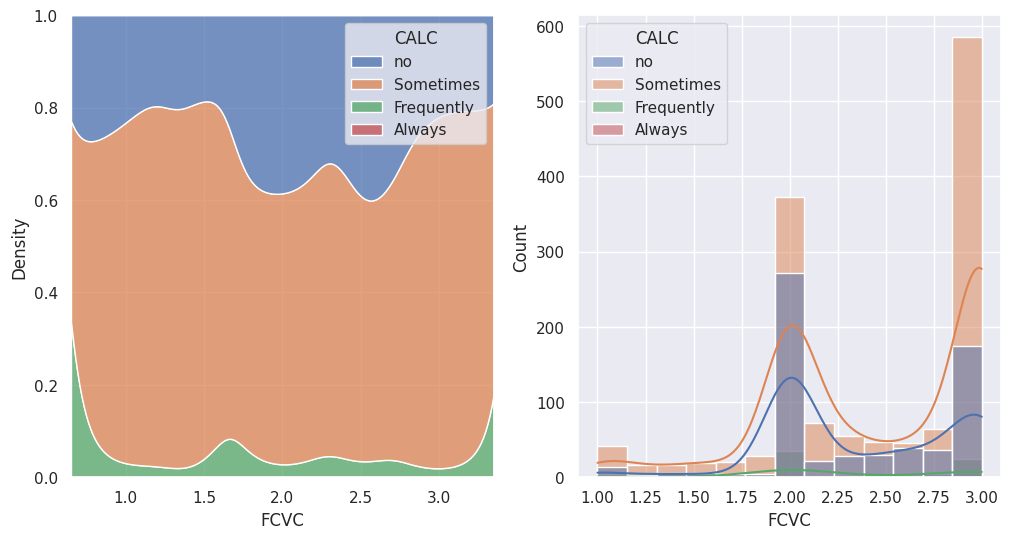

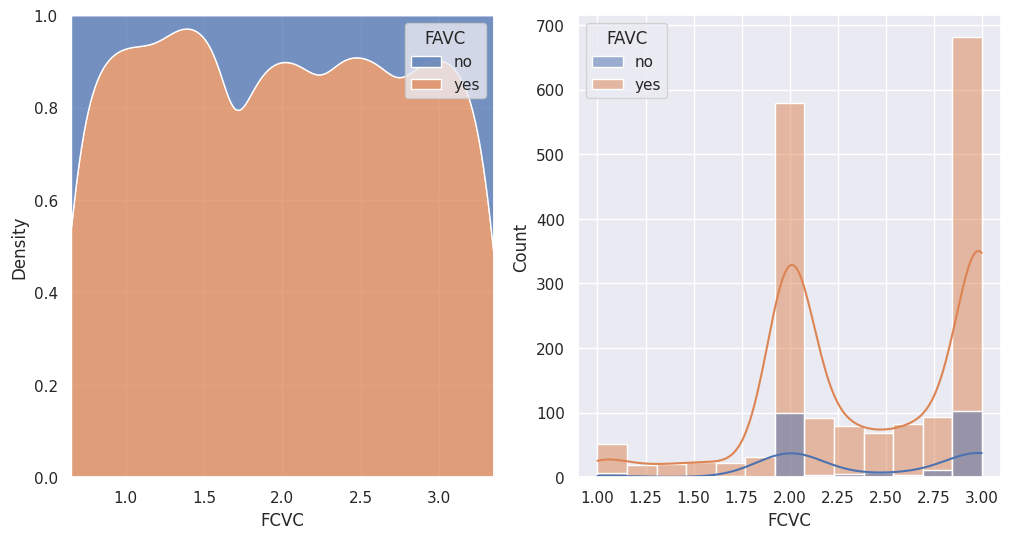

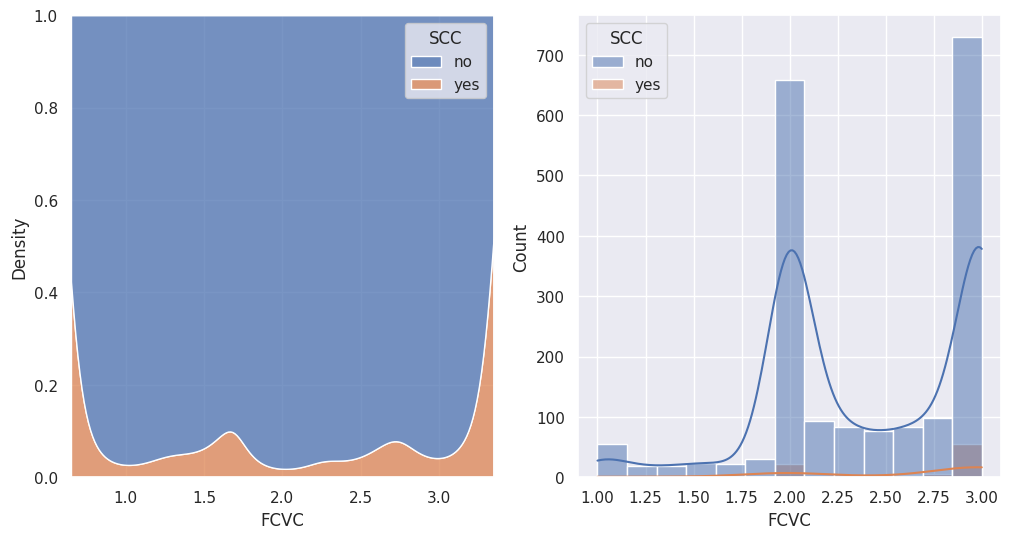

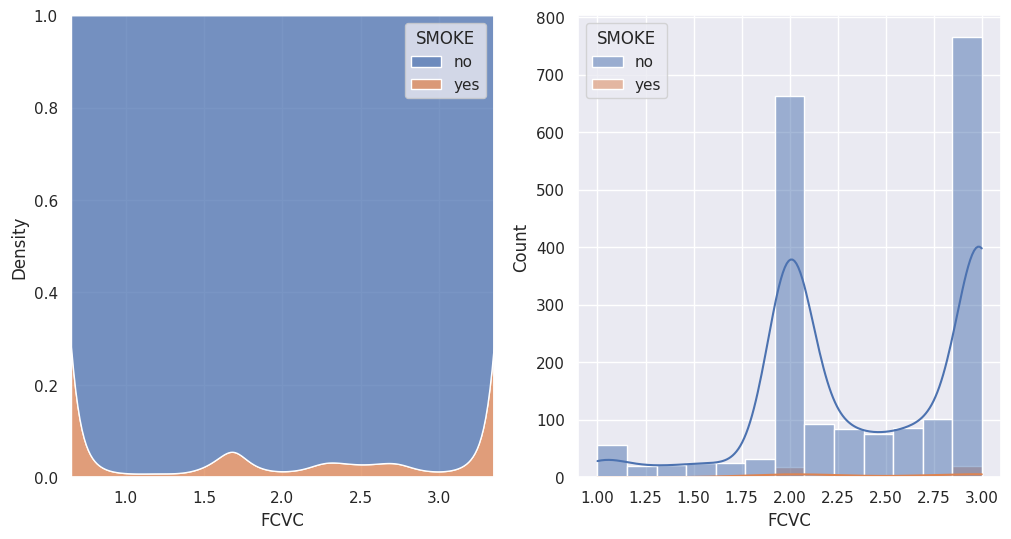

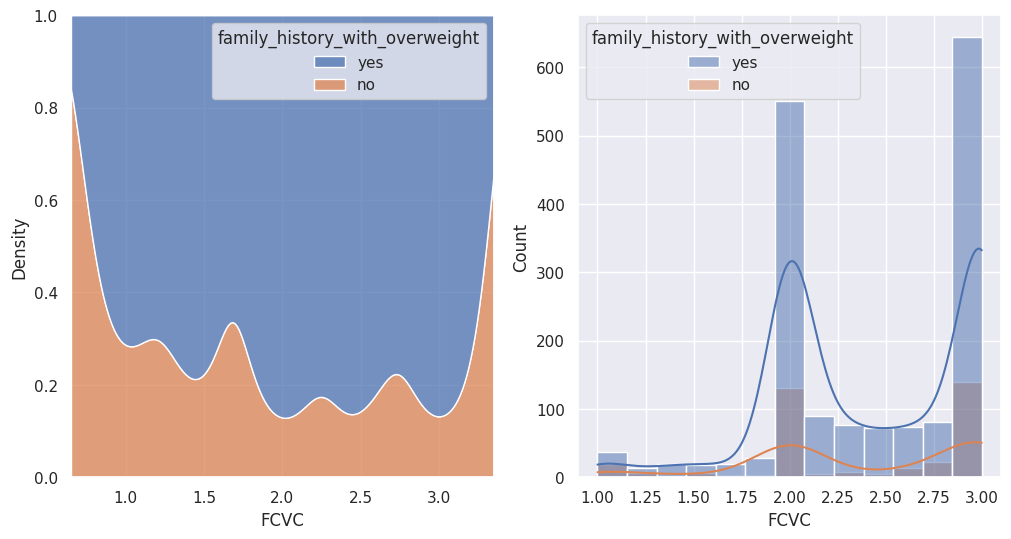

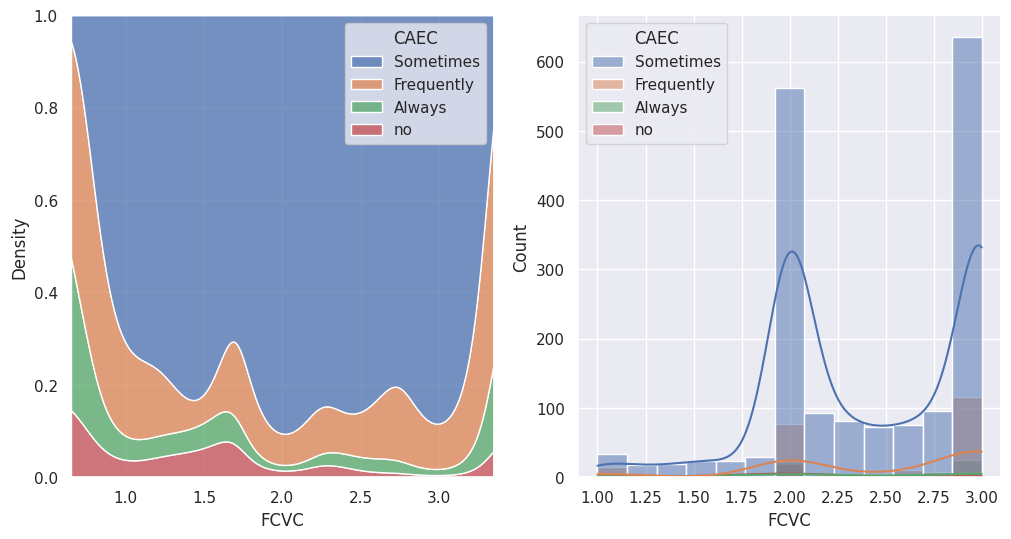

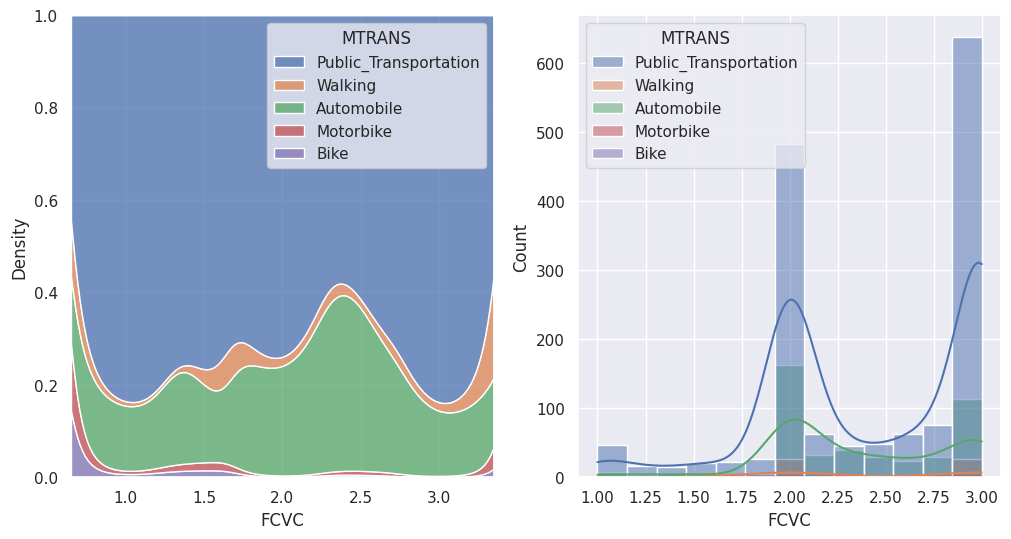

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


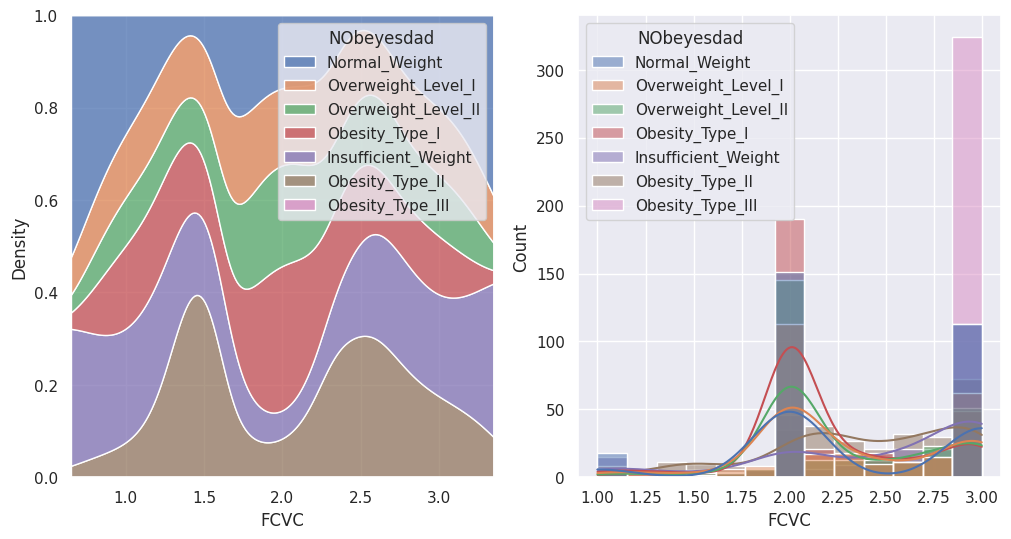


__________________________________________________________The NCP ________________________________________________________________



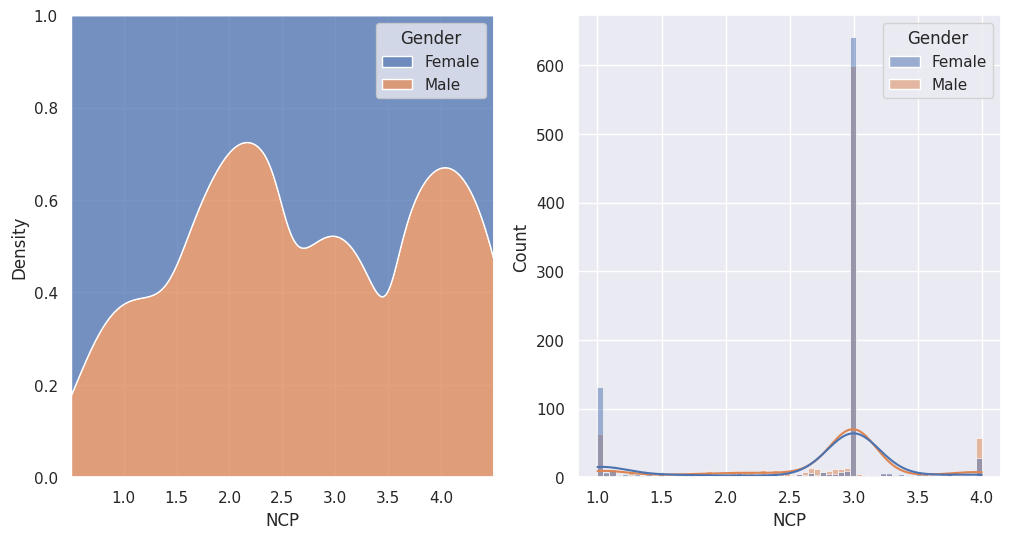

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


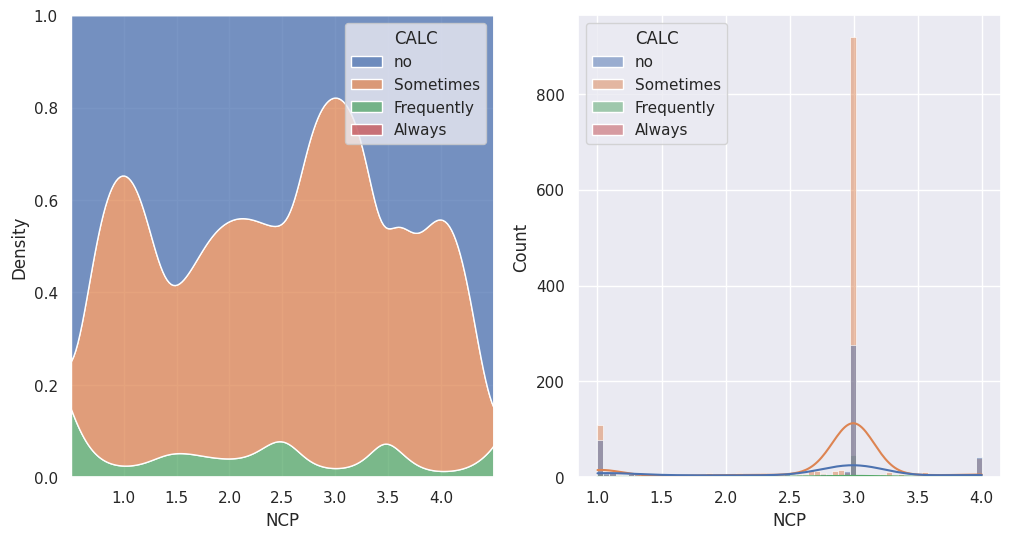

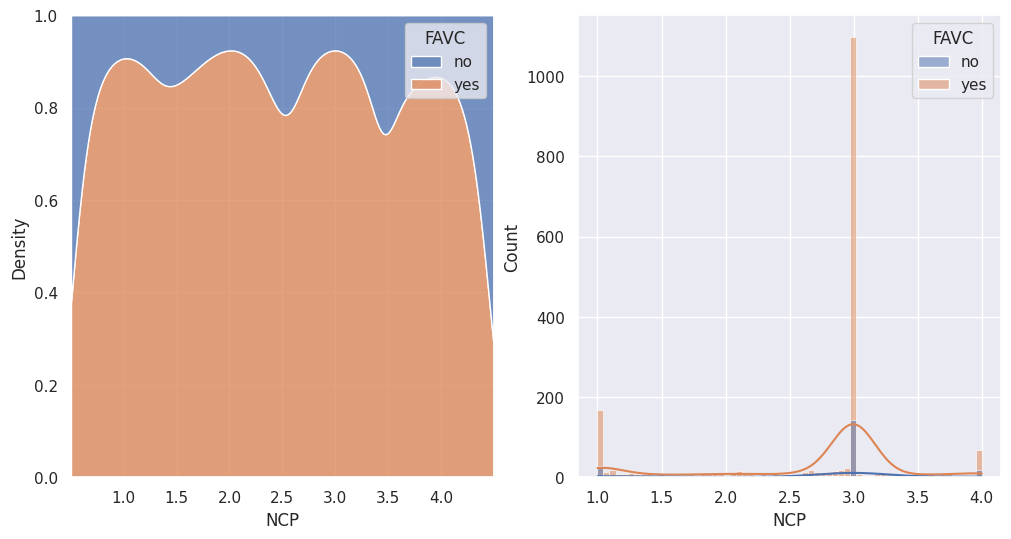

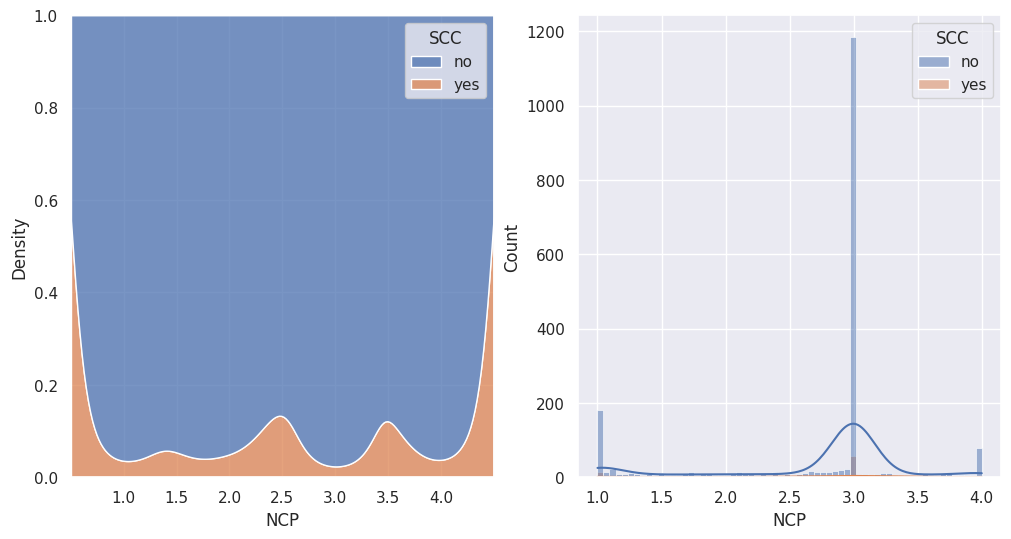

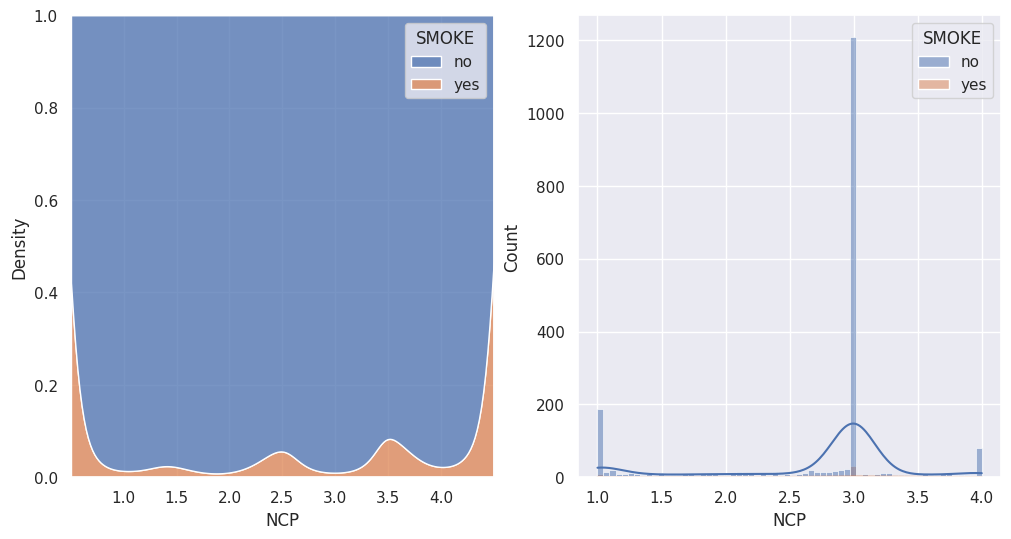

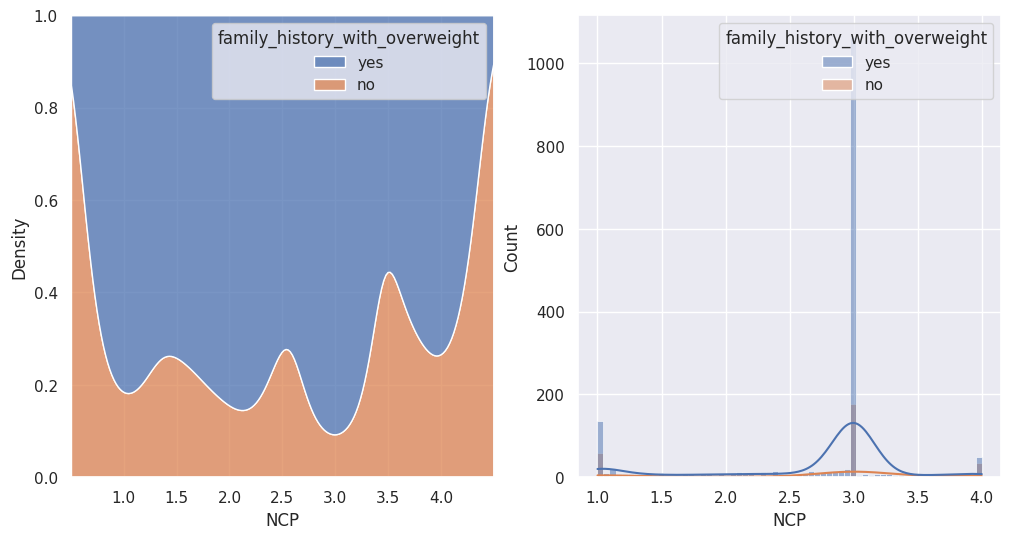

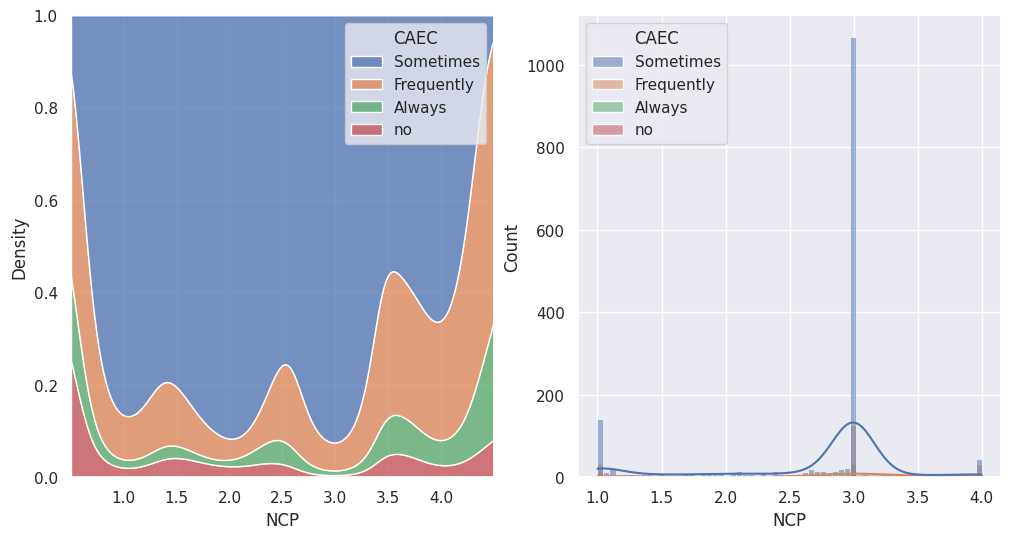

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


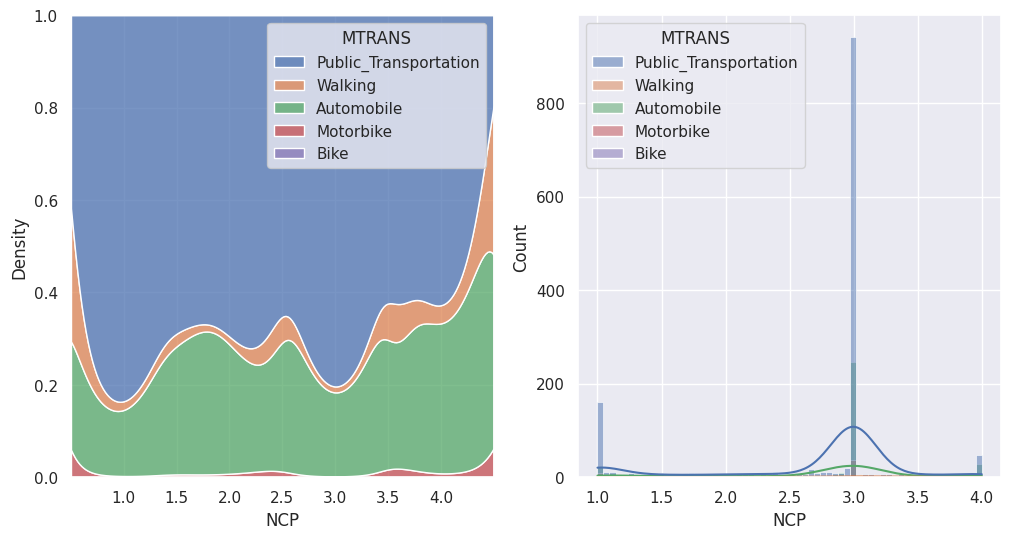

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


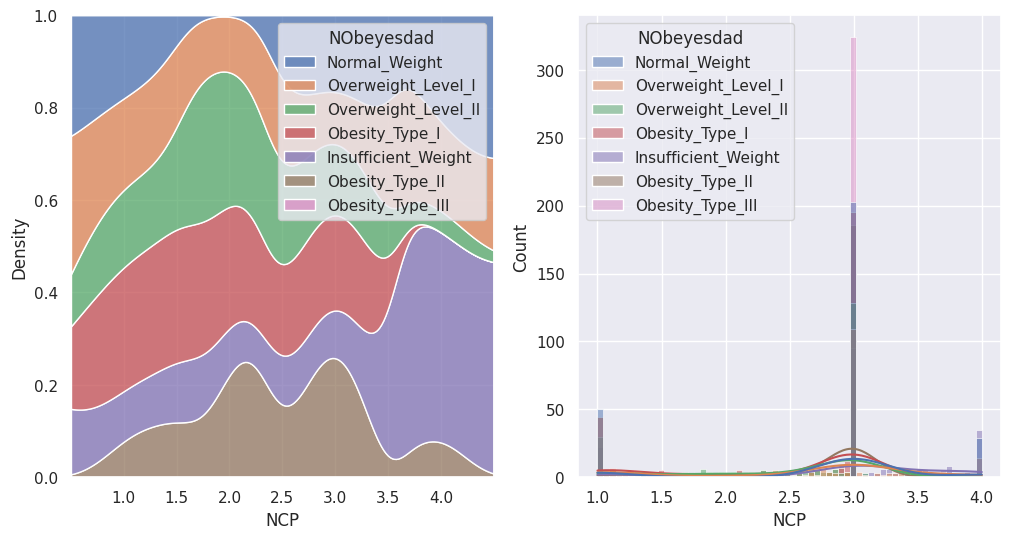


__________________________________________________________The CH2O ________________________________________________________________



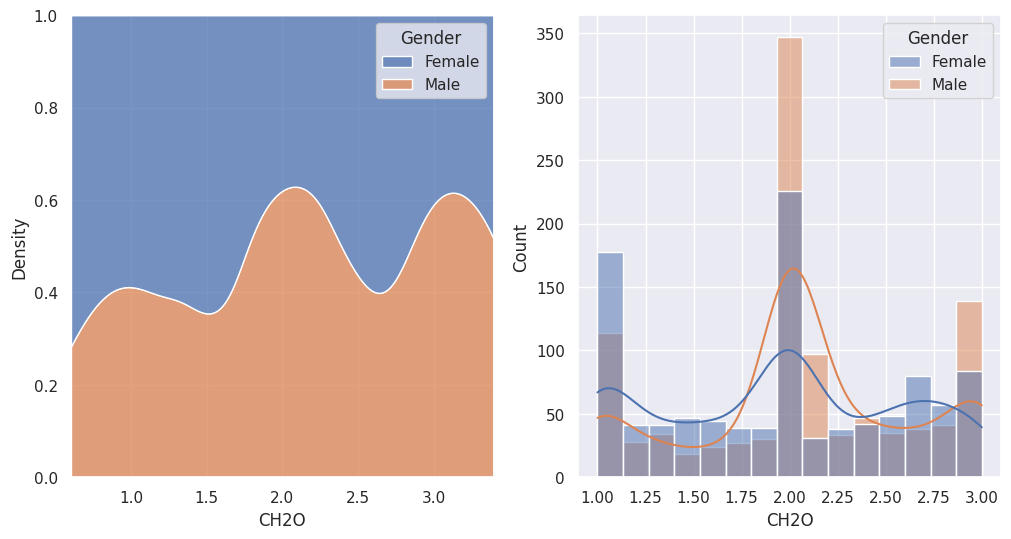

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


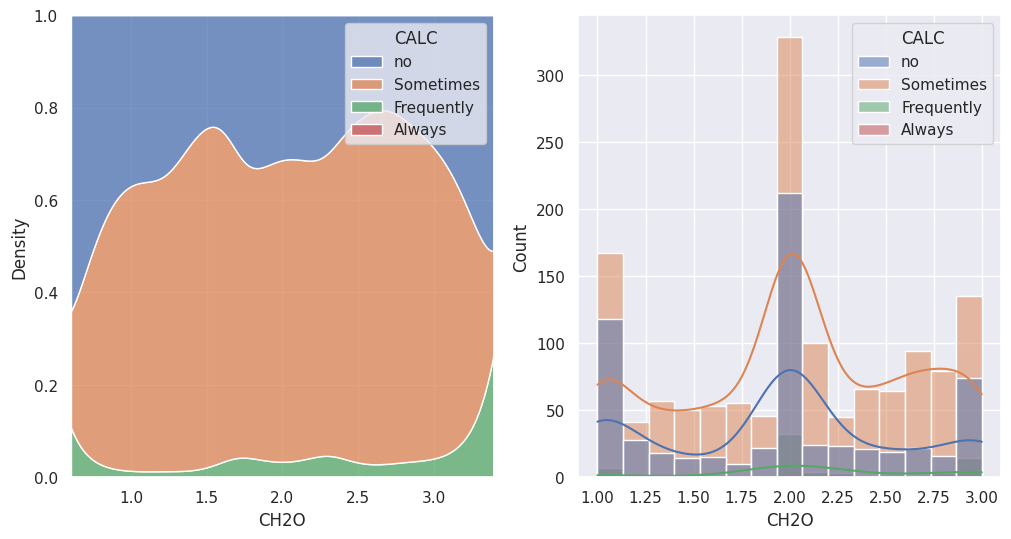

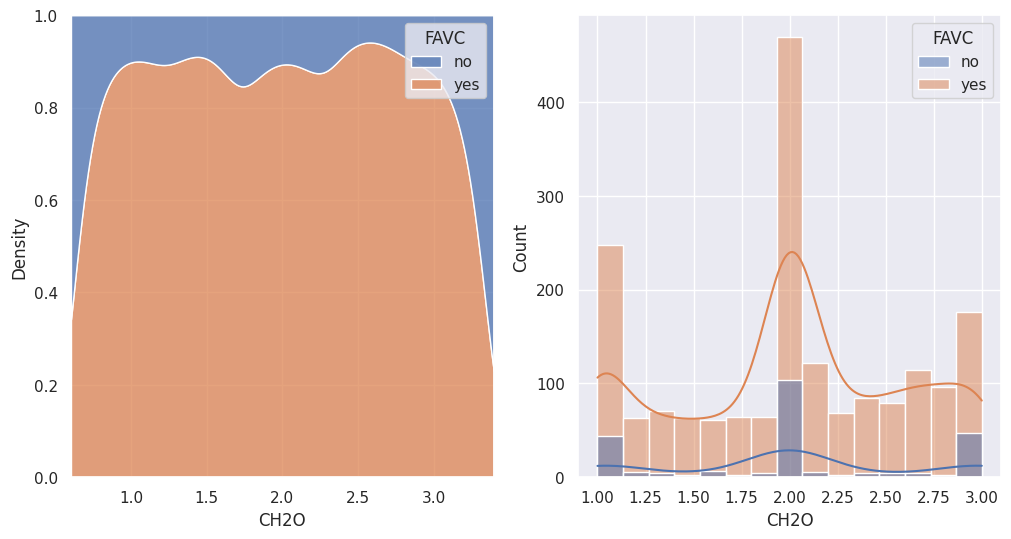

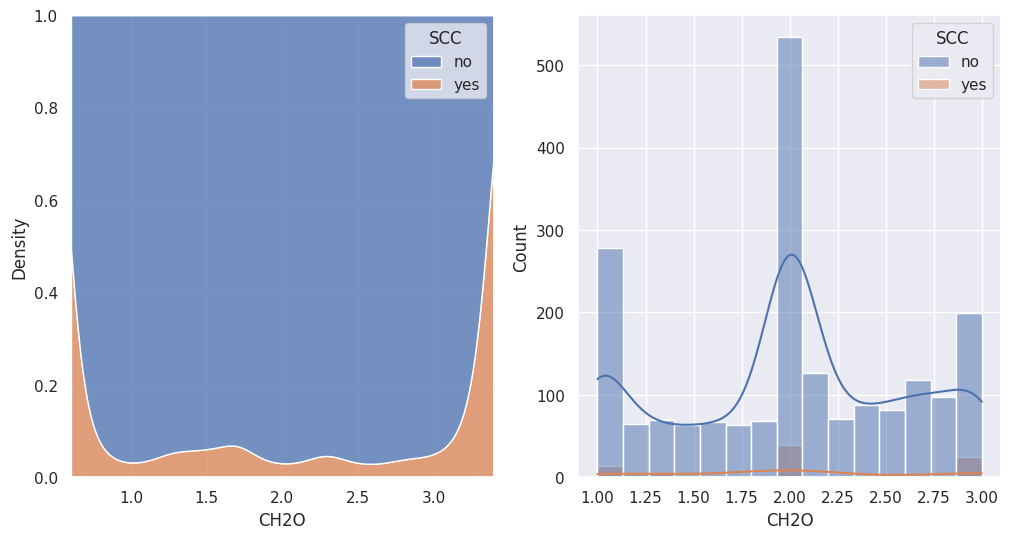

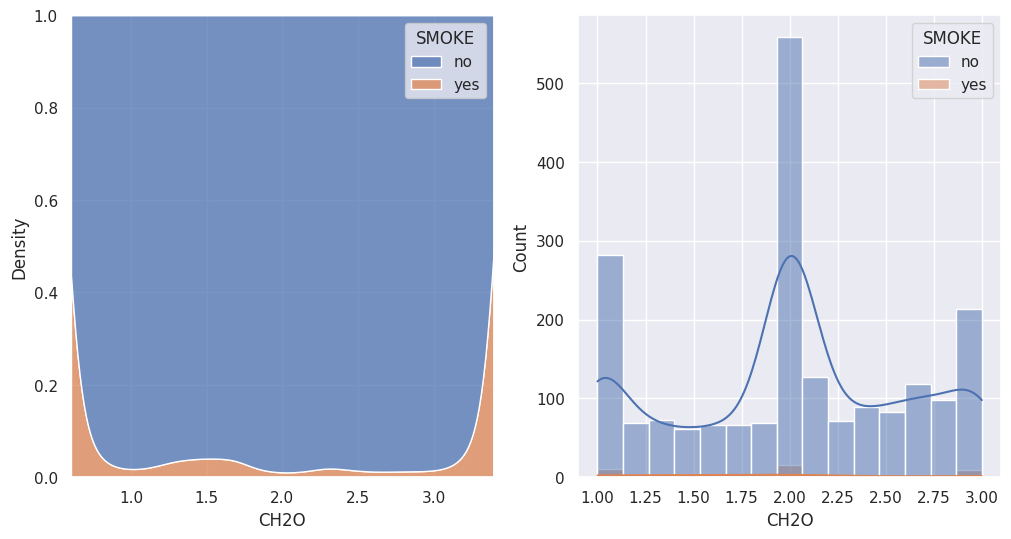

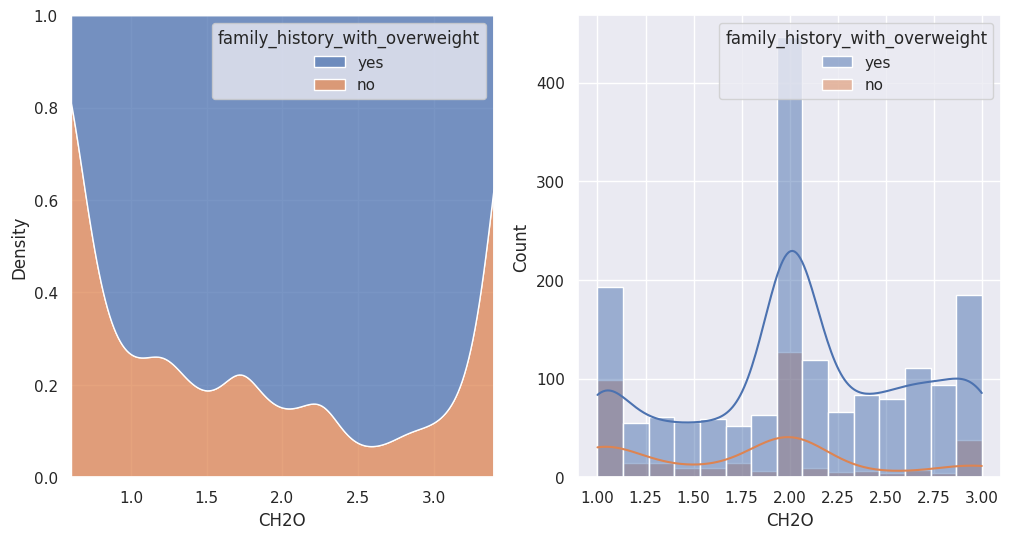

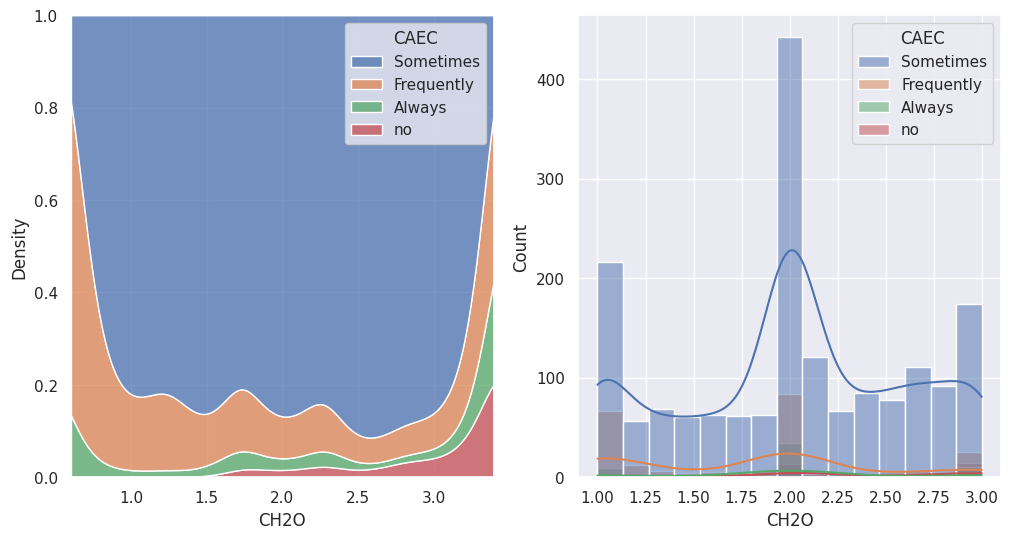

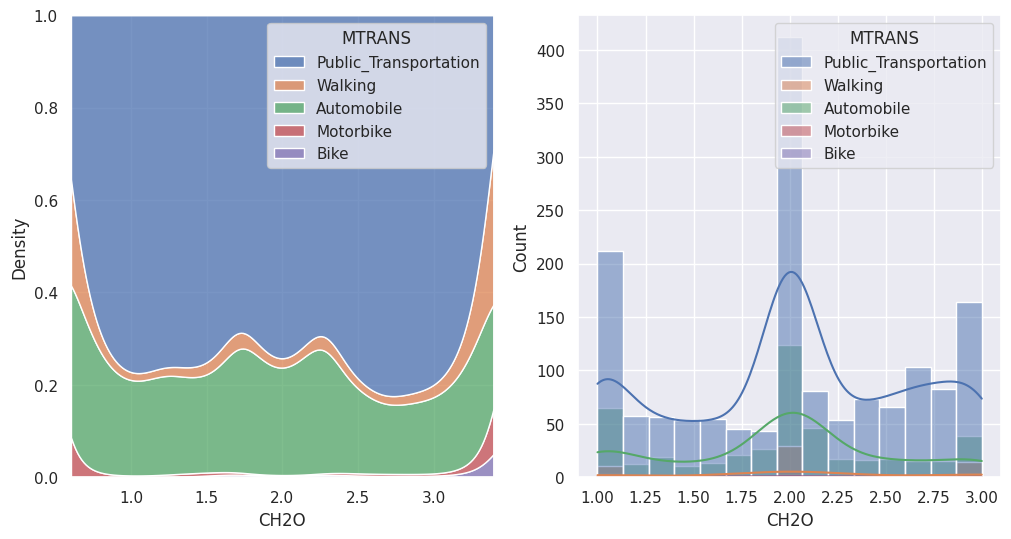

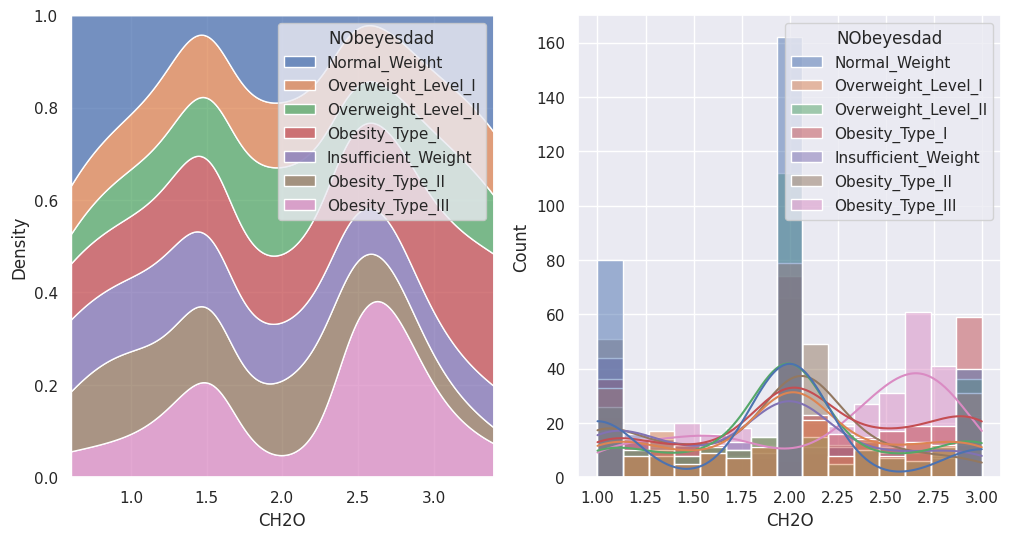


__________________________________________________________The FAF ________________________________________________________________



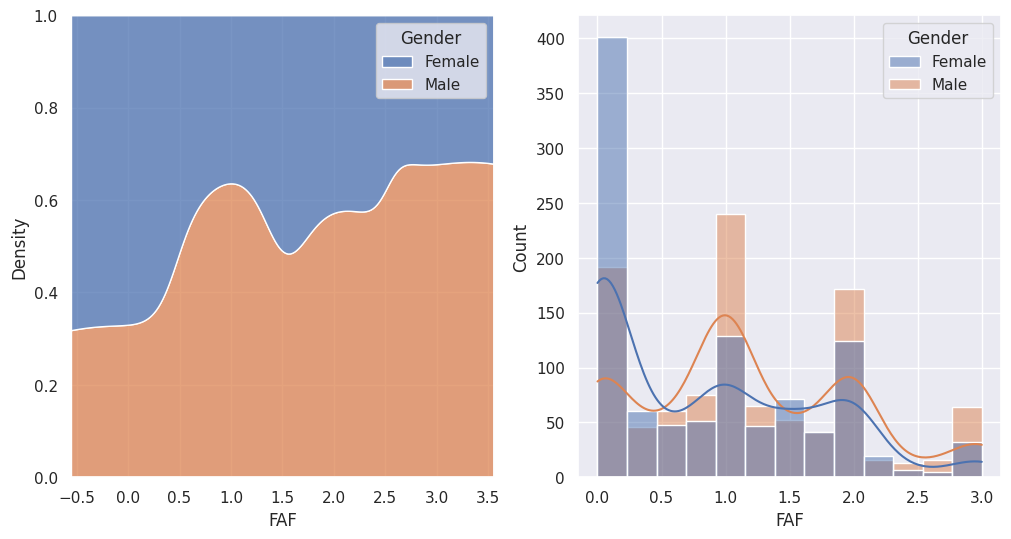

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


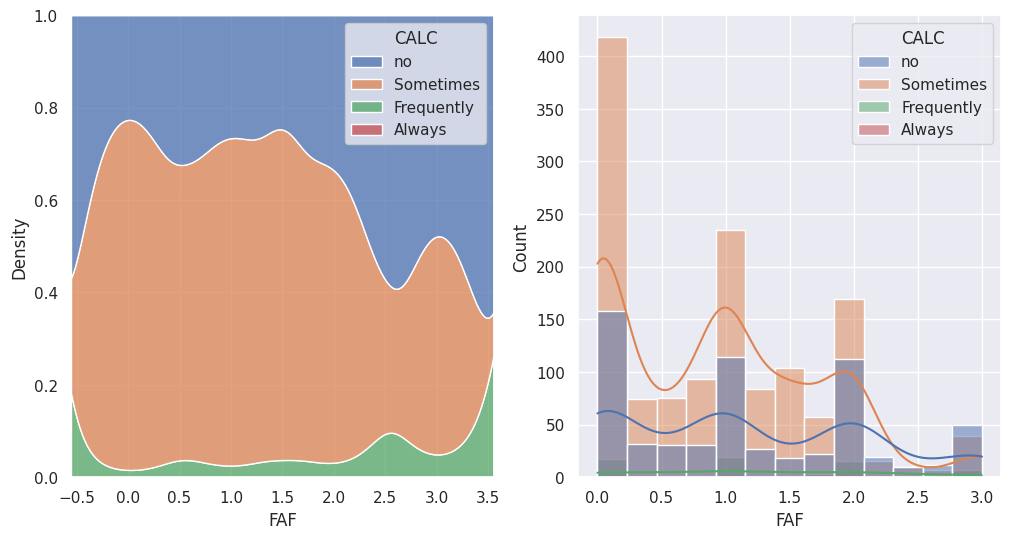

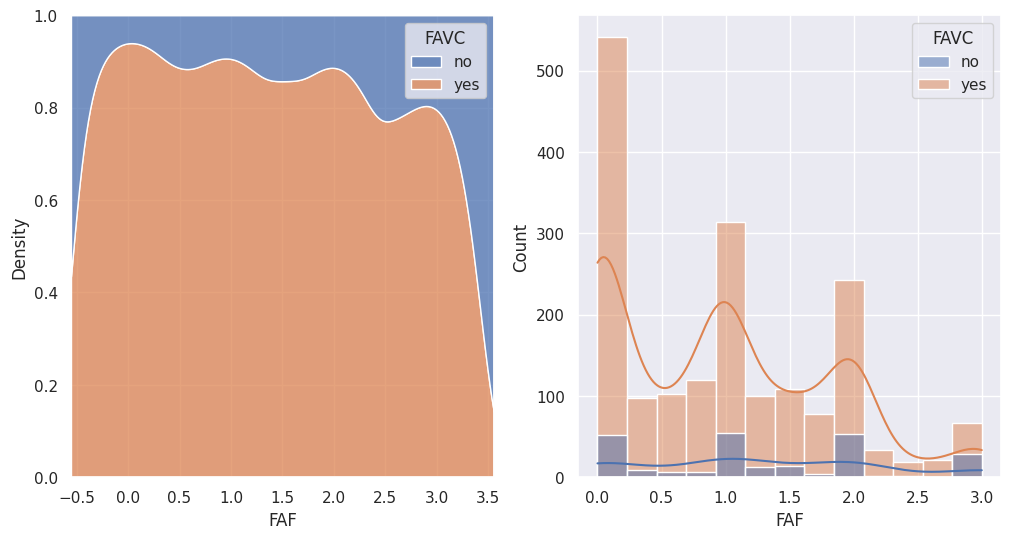

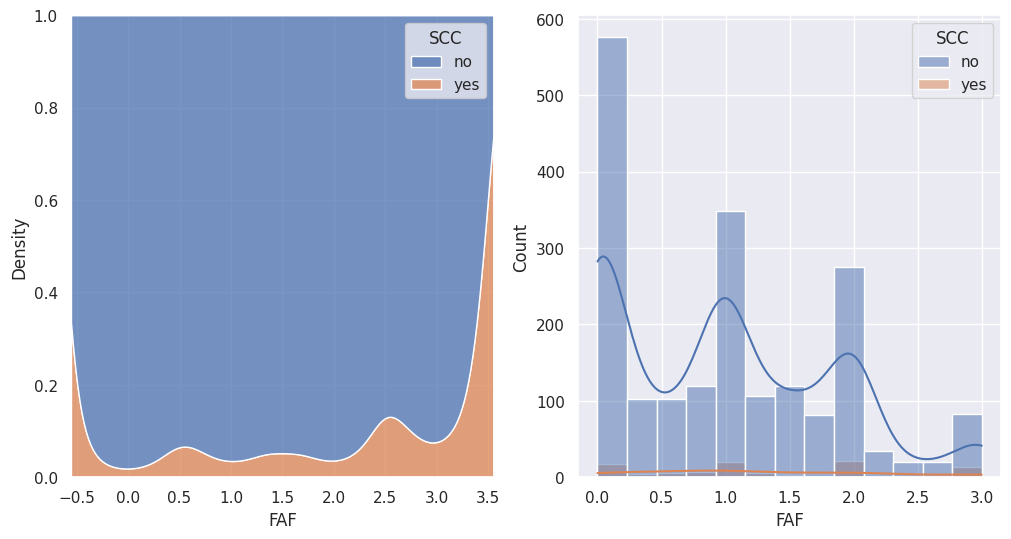

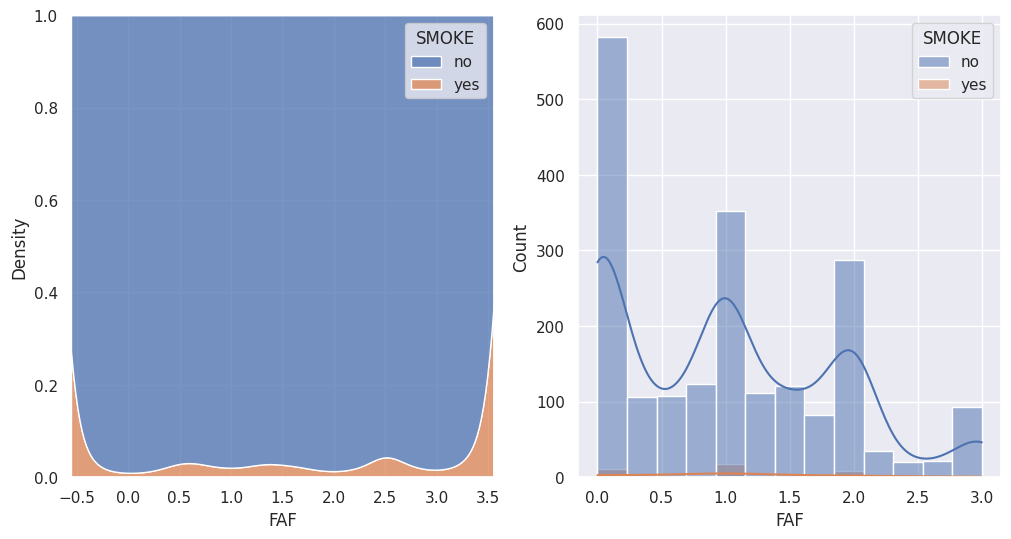

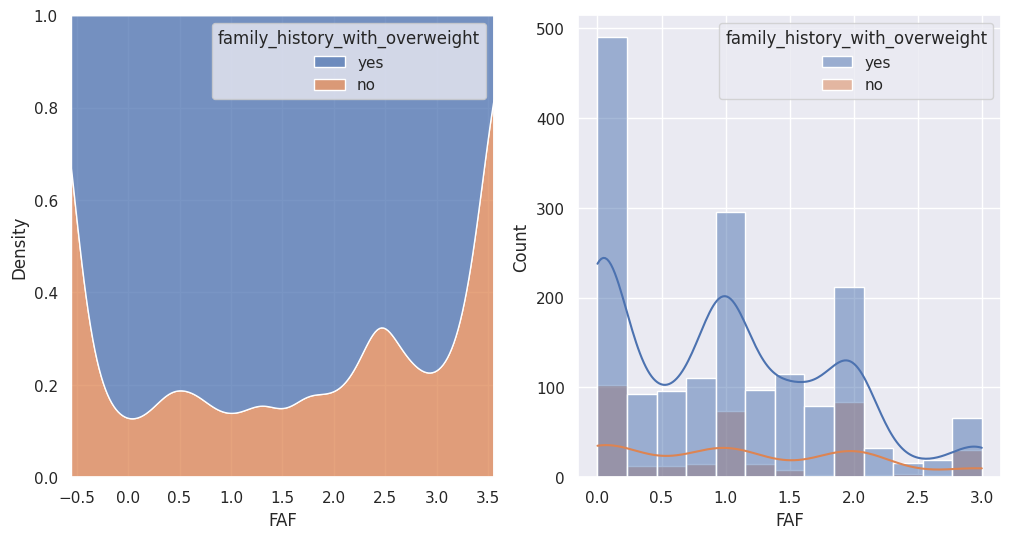

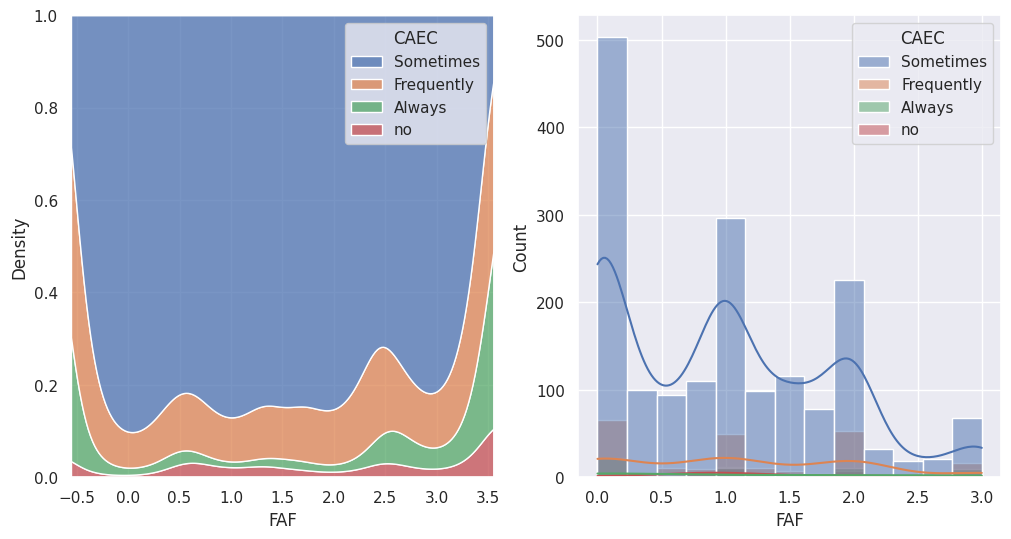

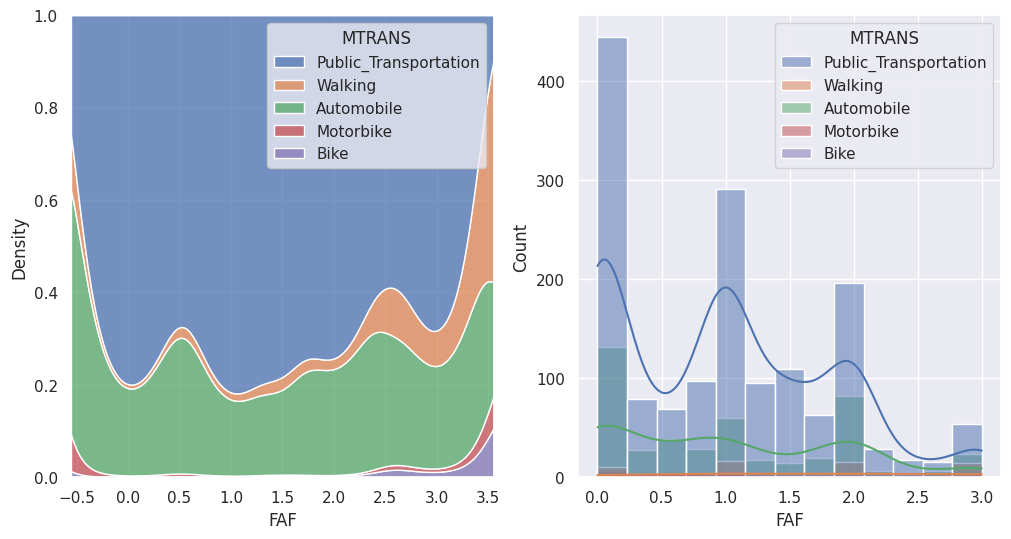

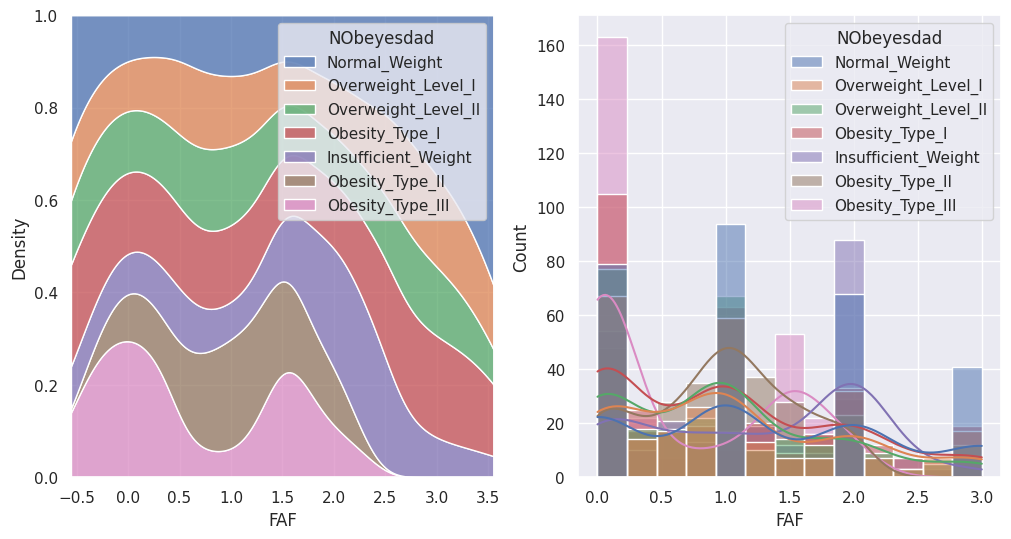


__________________________________________________________The TUE ________________________________________________________________



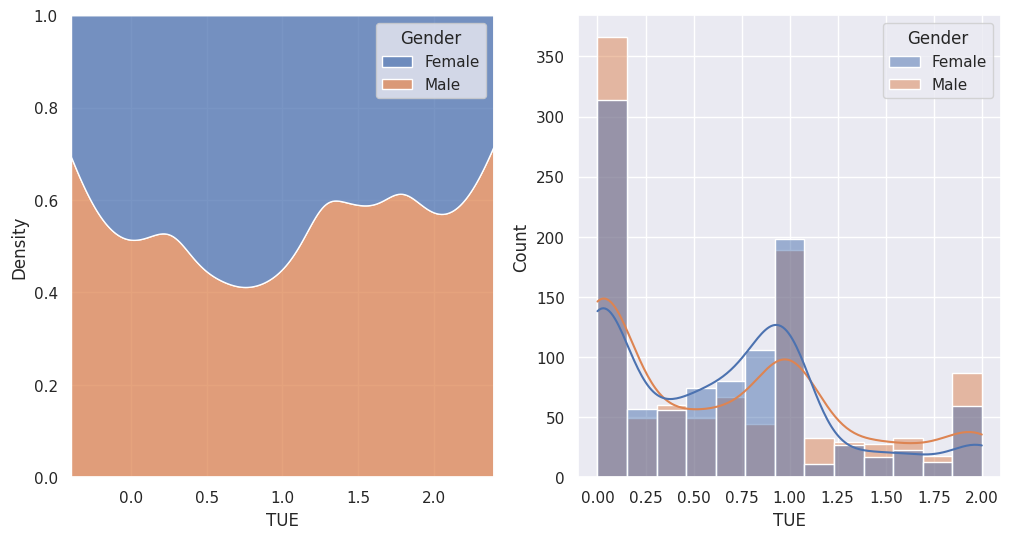

/tmp/ipykernel_36/648775628.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data,x=i,hue=j,multiple="fill")


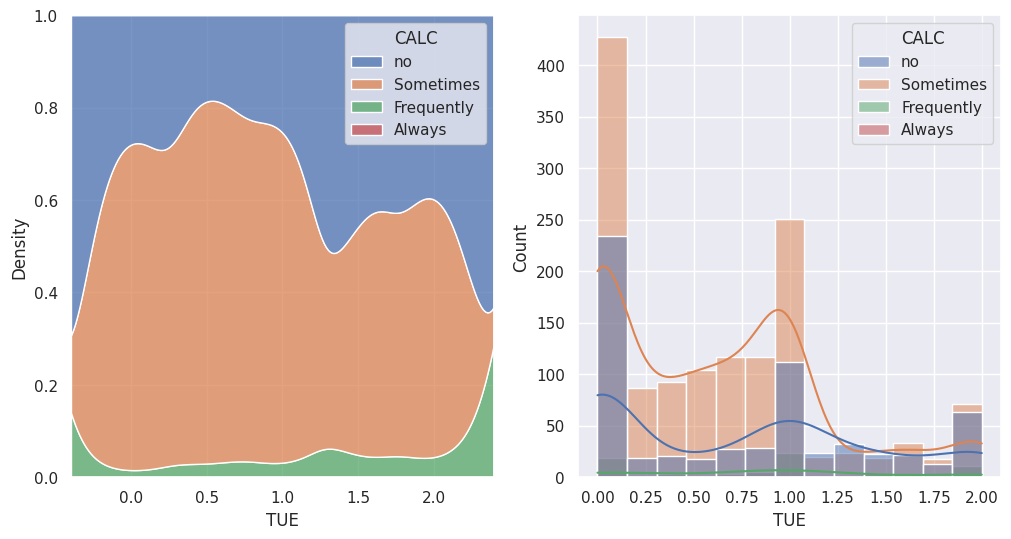

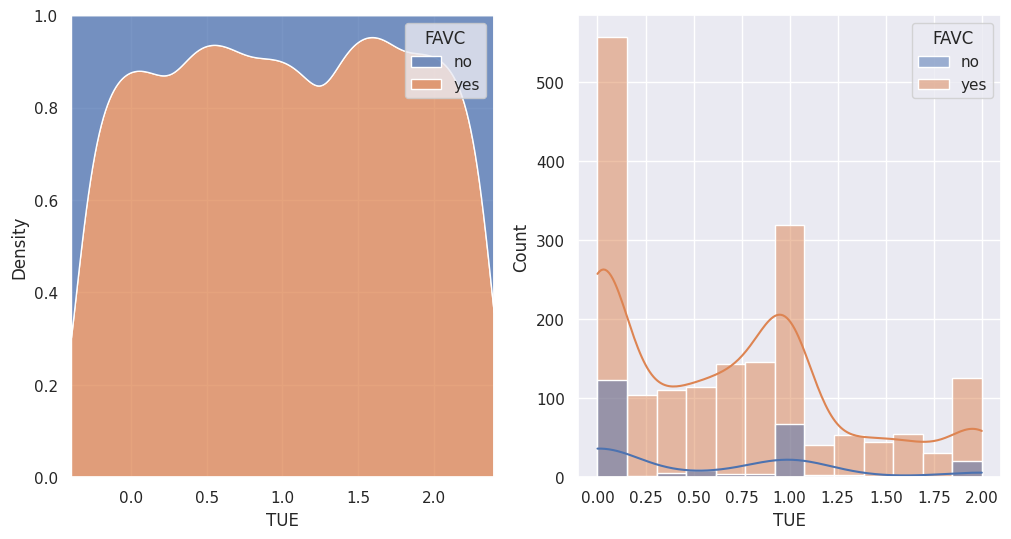

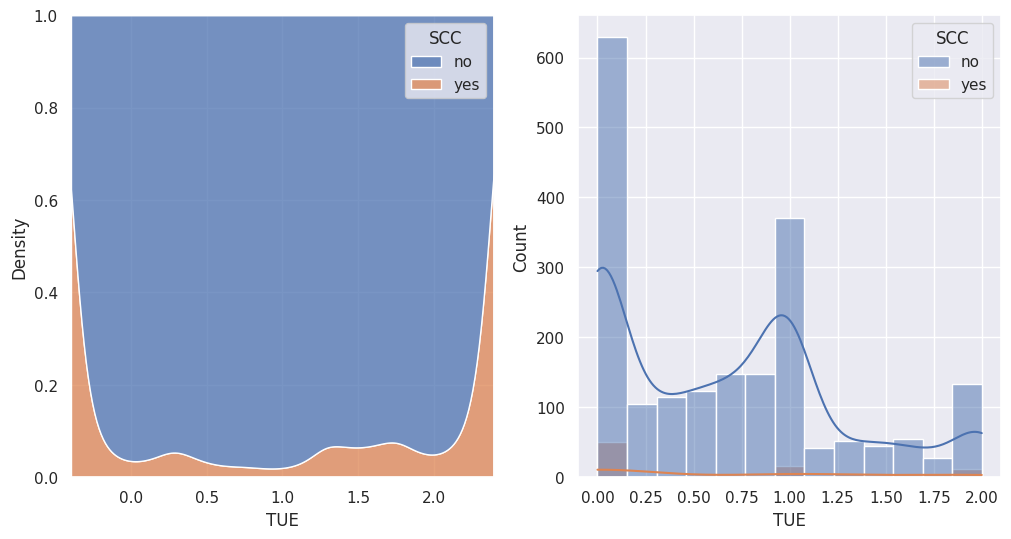

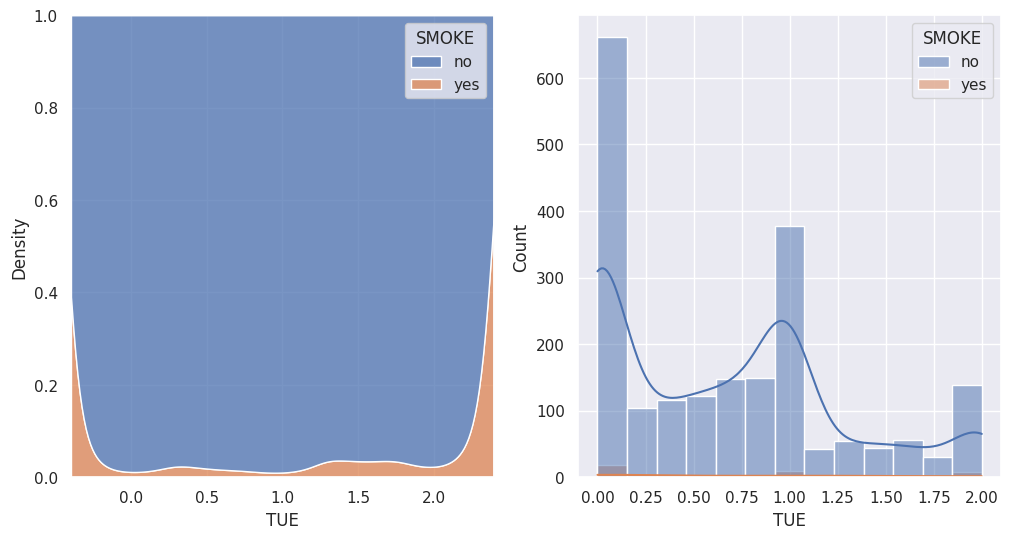

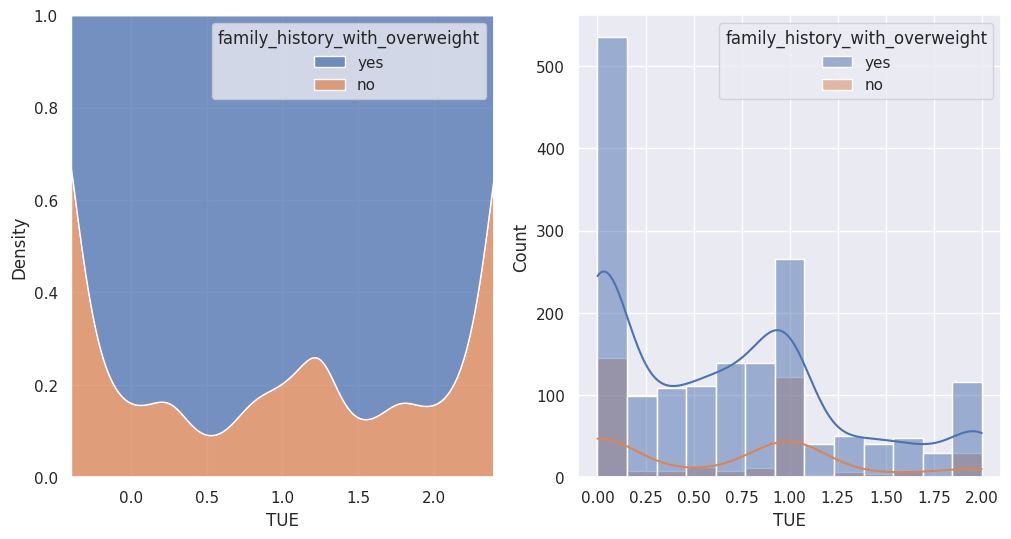

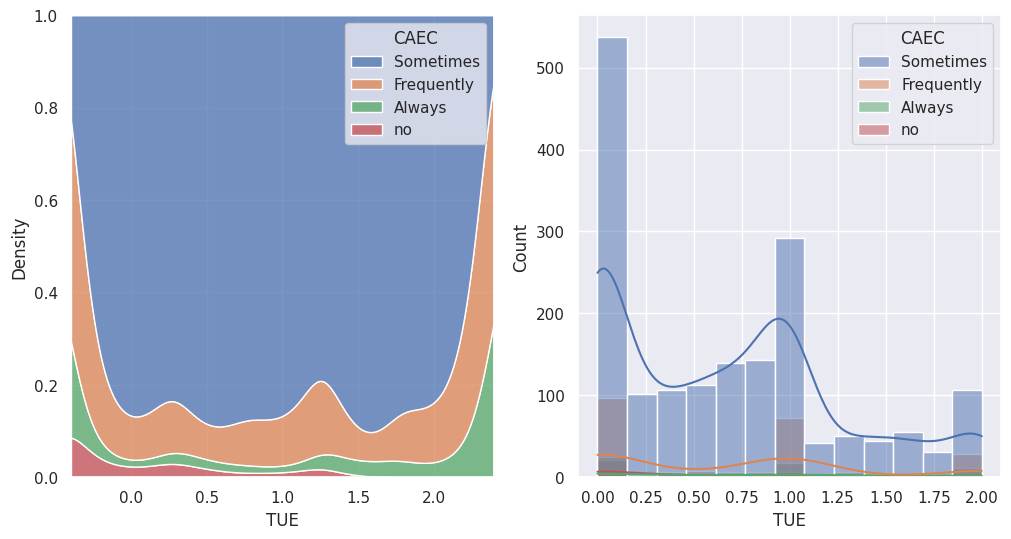

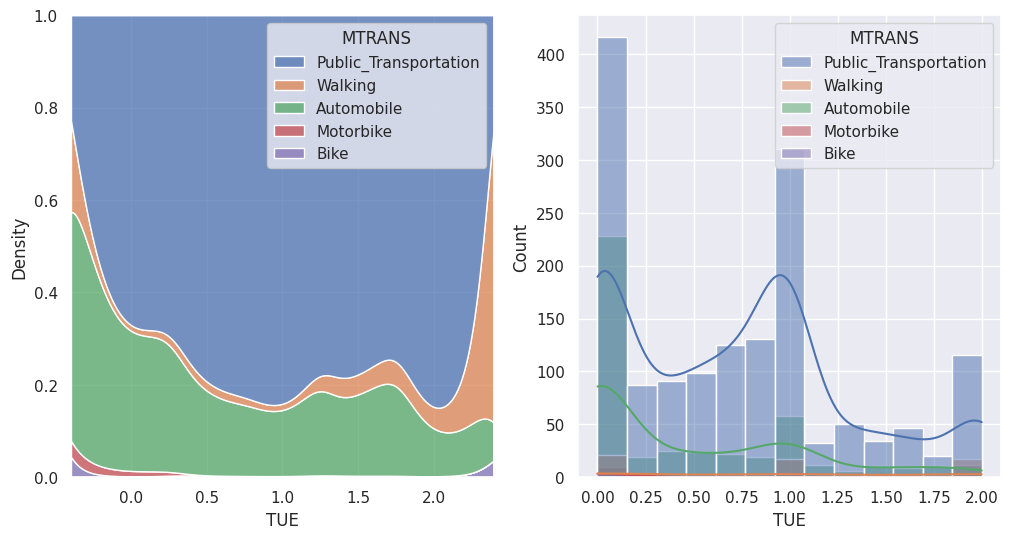

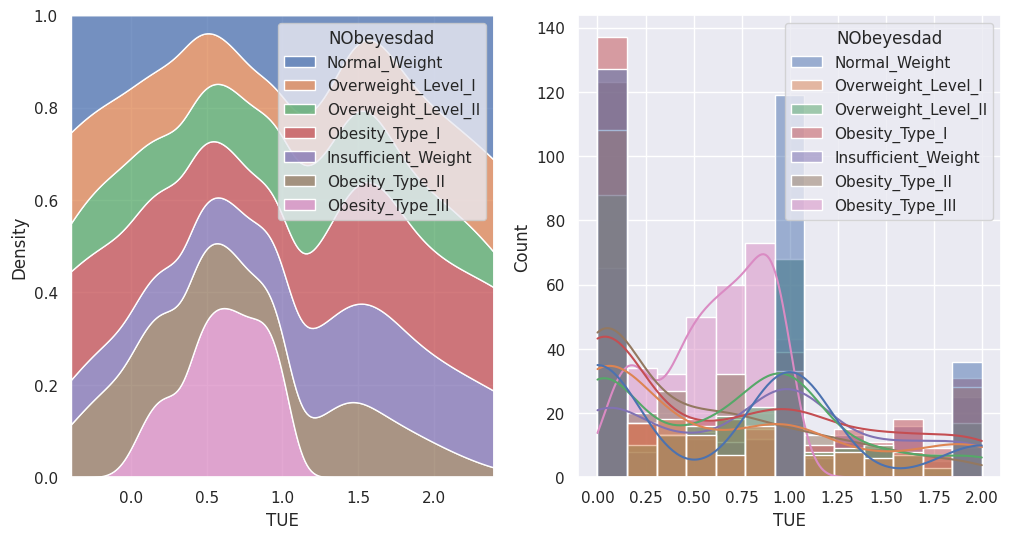

In [46]:
for i in data_col:
    print(f"__________________________________________________________The {i} ________________________________________________________________\n")
    for j in data_object:
            plt.figure(figsize=(12, 6))
            
            plt.subplot(1,2,1)
            sns.kdeplot(data,x=i,hue=j,multiple="fill")
            
            plt.subplot(1,2,2)
            sns.histplot(data,x=i,hue=j,kde=True)
            
            plt.show()
    print("========================================================================================================================================\n")

# **Encoding Data**

In [49]:
le=LabelEncoder()
for col in data_object:
    data[col]=le.fit_transform(data[col])

In [50]:
data.head()

Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     3     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     2     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     1     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     1     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               1  0.0  1.0     2       3           1  
1                               1  3.0  0.0     2       3           1  
2                               1  2.0  1.0     2       3           1  
3                               0  2.0  0.0     2       4           5  
4                               0  0.0  0.0     2       3           6

# **Scaling**

In [51]:
scaler=StandardScaler()
data["Weight"] = scaler.fit_transform(data["Weight"].values.reshape(-1, 1))

In [52]:
data.loc[data["Age"]<=22,"Age"]=0
data.loc[(data["Age"]>22) & (data["Age"]<=26),"Age"]=1
data.loc[(data["Age"]>26) & (data["Age"]<=36),"Age"]=2
data.loc[(data["Age"]>36) & (data["Age"]<=46),"Age"]=3
data.loc[(data["Age"]>46) & (data["Age"]<=56),"Age"]=4
data.loc[data["Age"]>56,"Age"]=5

In [53]:
data.head()

Age  Gender  Height    Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  0.0       0    1.62 -0.872985     3     0   2.0  3.0    0      0   2.0   
1  0.0       0    1.52 -1.178508     2     0   3.0  3.0    1      1   3.0   
2  1.0       1    1.80 -0.376509     1     0   2.0  3.0    0      0   2.0   
3  2.0       1    1.80  0.005395     1     0   3.0  3.0    0      0   2.0   
4  0.0       1    1.78  0.112328     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               1  0.0  1.0     2       3           1  
1                               1  3.0  0.0     2       3           1  
2                               1  2.0  1.0     2       3           1  
3                               0  2.0  0.0     2       4           5  
4                               0  0.0  0.0     2       3           6

# **Spliting the data**

In [54]:
train=data.drop("NObeyesdad",axis=1)
test=data["NObeyesdad"]
train.head()

Age  Gender  Height    Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  0.0       0    1.62 -0.872985     3     0   2.0  3.0    0      0   2.0   
1  0.0       0    1.52 -1.178508     2     0   3.0  3.0    1      1   3.0   
2  1.0       1    1.80 -0.376509     1     0   2.0  3.0    0      0   2.0   
3  2.0       1    1.80  0.005395     1     0   3.0  3.0    0      0   2.0   
4  0.0       1    1.78  0.112328     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  
0                               1  0.0  1.0     2       3  
1                               1  3.0  0.0     2       3  
2                               1  2.0  1.0     2       3  
3                               0  2.0  0.0     2       4  
4                               0  0.0  0.0     2       3

In [55]:
test.head()

0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int64

In [56]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=.3,random_state=42)
x_train.head()

Age  Gender    Height    Weight  CALC  FAVC  FCVC       NCP  SCC  SMOKE  \
280   0.0       1  1.750000 -0.949366     2     1   3.0  4.000000    0      1   
1197  2.0       1  1.685127 -0.109677     3     1   2.0  2.473911    0      0   
102   0.0       0  1.550000 -1.140318     2     1   2.0  4.000000    1      0   
2050  0.0       0  1.694439  1.373110     2     1   3.0  3.000000    0      0   
852   0.0       0  1.755427 -0.326858     2     1   3.0  1.000000    0      0   

          CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
280   2.000000                               0  0.000000  0.000000     1   
1197  2.452789                               1  0.932792  0.000000     2   
102   2.000000                               0  2.000000  0.000000     1   
2050  1.409444                               1  0.933595  0.840393     2   
852   2.000000                               1  2.877473  0.000000     2   

      MTRANS  
280        3  
1197       0  
102        0  
2050       3  
852        3

In [57]:
x_test.head()

Age  Gender    Height    Weight  CALC  FAVC      FCVC  NCP  SCC  SMOKE  \
1337  0.0       0  1.681719  0.145626     2     1  1.524428  3.0    0      0   
1763  2.0       1  1.848845  1.459605     2     1  2.496190  3.0    0      1   
389   0.0       0  1.610000 -0.834794     3     1  1.000000  1.0    0      0   
595   0.0       1  1.819557 -1.089711     3     1  2.559600  4.0    0      0   
1735  2.0       1  1.816197  1.251273     2     1  2.247037  3.0    0      0   

          CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
1337  1.383831                               1  0.130417  1.000000     2   
1763  1.662117                               1  0.992371  0.217632     2   
389   2.000000                               1  0.000000  0.000000     2   
595   2.000000                               1  2.000000  0.331483     2   
1735  2.718408                               1  0.763595  0.000000     2   

      MTRANS  
1337       3  
1763       3  
389        3  
595        0  
1735       3

# **ML Models**

> **KNN**

In [77]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
y_pred=knn.predict(x_test)
y_pred

array([2, 3, 2, 0, 3, 5, 2, 4, 5, 1, 3, 5, 4, 1, 6, 5, 0, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 3, 6, 4, 0, 6, 0, 2, 0, 2, 5, 4,
       2, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 0, 3, 1, 3,
       2, 5, 0, 2, 6, 0, 2, 2, 2, 0, 3, 0, 0, 0, 5, 5, 4, 2, 0, 1, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 2, 6, 2, 6, 6, 6, 0, 2, 4, 2,
       0, 3, 2, 0, 4, 3, 1, 3, 0, 3, 0, 5, 5, 0, 5, 4, 5, 1, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 5, 5, 5, 4, 6, 1, 1, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       0, 3, 0, 4, 4, 2, 0, 3, 3, 0, 3, 0, 0, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 5, 6, 0, 0, 0, 3, 3, 0, 2, 1, 3, 6, 2, 3, 3, 2, 0, 4, 1, 5, 5,
       6, 1, 2, 4, 2, 5, 6, 6, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 5, 4,
       2, 0, 2, 4, 2, 3, 5, 4, 6, 6, 2, 5, 2, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 0, 1, 5, 3, 4, 6, 4, 1, 1, 2, 0, 4, 5, 4, 2, 2, 0, 3, 4,
       2, 5, 2, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 5, 5, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 0, 0, 4, 0, 6, 2,

**Model Evaluation**

Accuracy: 81.18022328548645

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        87
           1       0.73      0.32      0.44        95
           2       0.80      0.86      0.83       105
           3       0.96      0.99      0.97        95
           4       1.00      1.00      1.00        91
           5       0.68      0.76      0.72        80
           6       0.79      0.81      0.80        74

    accuracy                           0.81       627
   macro avg       0.81      0.81      0.80       627
weighted avg       0.81      0.81      0.80       627


__________________________________________________

[[83  3  0  0  0  1  0]
 [31 30 10  0  0 14 10]
 [ 0  0 90  4  0  8  3]
 [ 0  0  1 94  0  0  0]
 [ 0  0  0  0 91  0  0]
 [ 3  6  7  0  0 61  3]
 [ 1  2  5  0  0  6 60]]


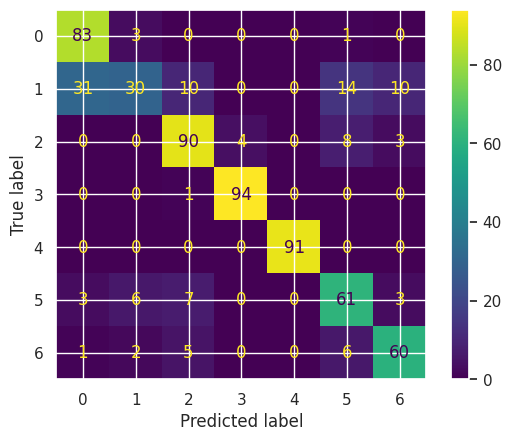

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **SVC**

In [91]:
svc=SVC(kernel="rbf",C=2)
svc.fit(x_train,y_train)

SVC(C=2)

In [92]:
y_pred=svc.predict(x_test)
y_pred

array([2, 3, 5, 0, 3, 5, 2, 4, 0, 1, 3, 2, 4, 1, 6, 5, 5, 3, 6, 6, 4, 5,
       0, 0, 2, 2, 0, 0, 0, 2, 5, 1, 2, 3, 6, 4, 5, 1, 0, 1, 0, 2, 5, 4,
       1, 5, 3, 5, 0, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 6, 6, 2, 0, 3, 1, 3,
       2, 5, 2, 2, 6, 5, 2, 5, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 0, 6, 2, 6, 1, 1, 1, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 6, 1, 3, 0,
       6, 2, 6, 2, 6, 5, 5, 5, 4, 6, 1, 5, 4, 1, 5, 4, 4, 5, 0, 4, 4, 2,
       0, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 0, 4, 2, 1, 2, 0, 3, 5, 0, 6,
       6, 6, 6, 1, 0, 5, 3, 3, 0, 2, 1, 3, 6, 2, 3, 3, 2, 5, 4, 1, 2, 5,
       2, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 6, 4, 2, 3, 6, 4, 6, 6, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 2,
       4, 5, 3, 1, 1, 6, 3, 4, 2, 4, 1, 1, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 0, 5, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 6, 0, 0, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 86.1244019138756

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        87
           1       0.86      0.62      0.72        95
           2       0.88      0.94      0.91       105
           3       1.00      0.99      0.99        95
           4       1.00      1.00      1.00        91
           5       0.67      0.72      0.70        80
           6       0.73      0.77      0.75        74

    accuracy                           0.86       627
   macro avg       0.86      0.86      0.85       627
weighted avg       0.86      0.86      0.86       627


__________________________________________________

[[82  5  0  0  0  0  0]
 [15 59  0  0  0 19  2]
 [ 0  0 99  0  0  2  4]
 [ 0  0  1 94  0  0  0]
 [ 0  0  0  0 91  0  0]
 [ 0  5  2  0  0 58 15]
 [ 0  0 10  0  0  7 57]]


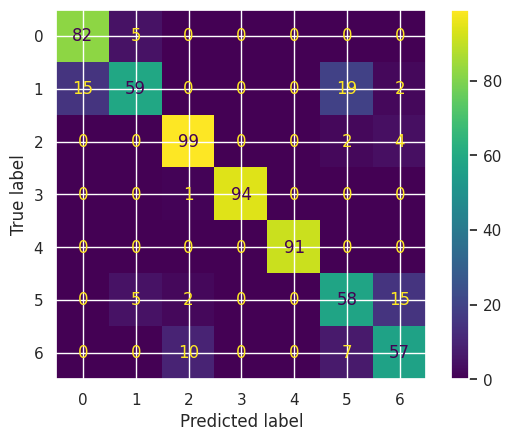

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **DescionTree**

In [172]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=15,max_features=15,random_state=42)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=15,
                       random_state=42)

In [173]:
y_pred=model1.predict(x_test)
y_pred

array([2, 3, 5, 0, 3, 5, 6, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 5, 1, 2, 5, 4,
       0, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 1, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 1, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 1, 2, 0, 5, 4, 5, 5, 5, 5, 3, 0,
       6, 2, 5, 2, 6, 5, 5, 5, 4, 5, 5, 5, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 1, 2, 0, 3, 5, 0, 6,
       6, 2, 5, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 6, 3, 3, 2, 1, 4, 0, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 2, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 5, 4, 6, 5, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 5, 3, 4, 6, 4, 1, 5, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 95.05582137161085

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        87
           1       0.91      0.83      0.87        95
           2       0.96      0.99      0.98       105
           3       1.00      0.97      0.98        95
           4       1.00      1.00      1.00        91
           5       0.84      0.95      0.89        80
           6       0.99      0.96      0.97        74

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627


__________________________________________________

[[ 83   4   0   0   0   0   0]
 [  4  79   0   0   0  12   0]
 [  0   0 104   0   0   0   1]
 [  0   0   3  92   0   0   0]
 [  0   0   0   0  91   0   0]
 [  0   4   0   0   0  76   0]
 [  0   0   1   0   0   2  71]]


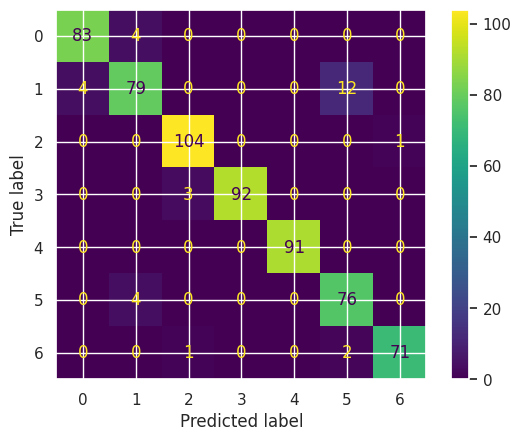

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **RandomForest**

In [175]:
model2=RandomForestClassifier(n_estimators=150,criterion="entropy",max_depth=15,max_features=15,random_state=42)
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=15,
                       n_estimators=150, random_state=42)

In [176]:
y_pred=model2.predict(x_test)
y_pred

array([2, 3, 5, 0, 3, 5, 6, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 1, 1, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 5, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 1, 2, 0, 3, 5, 0, 6,
       6, 2, 5, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 6, 3, 3, 2, 5, 4, 0, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 5, 4, 6, 5, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 5, 3, 4, 6, 4, 1, 5, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 97.28867623604465

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.97      0.89      0.93        95
           2       0.99      0.99      0.99       105
           3       1.00      0.99      0.99        95
           4       1.00      1.00      1.00        91
           5       0.92      1.00      0.96        80
           6       0.99      0.97      0.98        74

    accuracy                           0.97       627
   macro avg       0.97      0.97      0.97       627
weighted avg       0.97      0.97      0.97       627


__________________________________________________

[[ 84   3   0   0   0   0   0]
 [  5  85   0   0   0   5   0]
 [  0   0 104   0   0   0   1]
 [  0   0   1  94   0   0   0]
 [  0   0   0   0  91   0   0]
 [  0   0   0   0   0  80   0]
 [  0   0   0   0   0   2  72]]


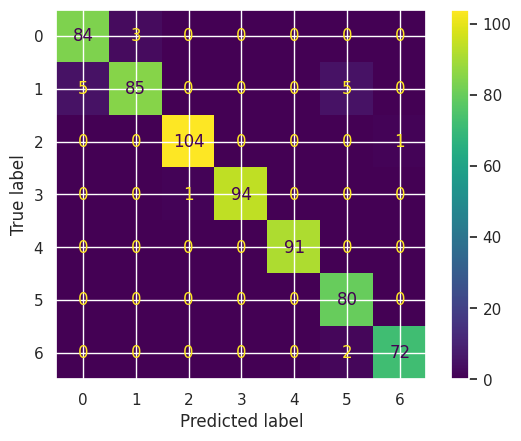

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **GradientBoostingClassifier**

In [178]:
model3=GradientBoostingClassifier(n_estimators=100,learning_rate=.5,random_state=42)
model3.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, random_state=42)

In [179]:
y_pred=model3.predict(x_test)
y_pred

array([2, 3, 5, 0, 3, 5, 6, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 5, 2, 3, 6, 4, 1, 1, 0, 1, 5, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 5, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 3, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 6, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       0, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 5, 4, 6, 1, 2, 0, 3, 5, 0, 6,
       6, 2, 6, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 1, 4, 0, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 5, 4, 6, 5, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 5, 3, 4, 6, 4, 1, 1, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 96.01275917065391

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.95      0.83      0.89        95
           2       1.00      0.98      0.99       105
           3       0.99      1.00      0.99        95
           4       1.00      1.00      1.00        91
           5       0.86      0.96      0.91        80
           6       0.95      0.99      0.97        74

    accuracy                           0.96       627
   macro avg       0.96      0.96      0.96       627
weighted avg       0.96      0.96      0.96       627


__________________________________________________

[[ 84   3   0   0   0   0   0]
 [  3  79   0   0   0  12   1]
 [  0   0 103   1   0   0   1]
 [  0   0   0  95   0   0   0]
 [  0   0   0   0  91   0   0]
 [  0   1   0   0   0  77   2]
 [  0   0   0   0   0   1  73]]


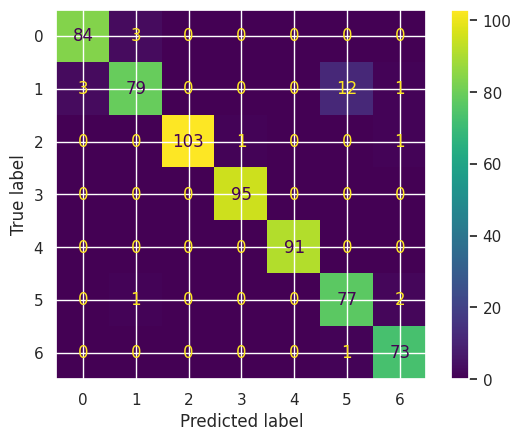

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **XGBClassifier**

In [181]:
model4=XGBClassifier()
model4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [182]:
y_pred=model4.predict(x_test)
y_pred

array([2, 3, 1, 0, 3, 5, 6, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 1, 1, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 5, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 2, 5, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 1, 4, 0, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 5, 4, 6, 5, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 5, 3, 4, 6, 4, 1, 5, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 97.28867623604465

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        87
           1       0.93      0.92      0.92        95
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.92      0.97      0.95        80
           6       1.00      0.97      0.99        74

    accuracy                           0.97       627
   macro avg       0.97      0.97      0.97       627
weighted avg       0.97      0.97      0.97       627


__________________________________________________

[[ 82   5   0   0   0   0   0]
 [  3  87   0   0   0   5   0]
 [  0   0 105   0   0   0   0]
 [  0   0   0  95   0   0   0]
 [  0   0   0   0  91   0   0]
 [  0   2   0   0   0  78   0]
 [  0   0   0   0   0   2  72]]


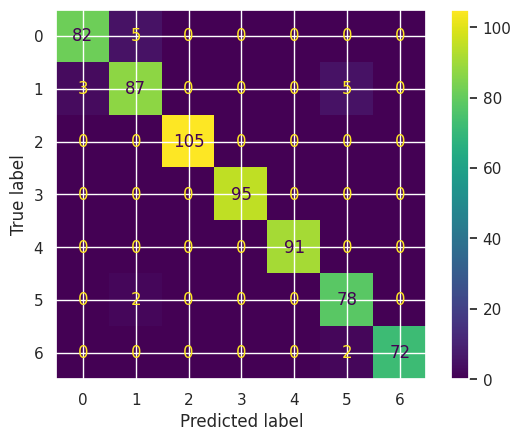

In [183]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

> **Voting**

In [188]:
model=VotingClassifier(estimators=[("SVC",svc),("KNeighborsClassifier",knn),("DecisionTreeClassifier",model1),
                                   ("RandomForestClassifier",model2),("GradientBoostingClassifier",model3),("XGBClassifier",model4)],voting="soft")
model.fit(x_train,y_train)

VotingClassifier(estimators=[('SVC', SVC(C=2)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     max_features=15,
                                                     random_state=42)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     max_features=15,
                                                     n_estimators=150,
                                                     random_state...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [189]:
y_pred=model4.predict(x_test)
y_pred

array([2, 3, 1, 0, 3, 5, 6, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 1, 1, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 1, 2, 1, 2, 0, 3, 1, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 5, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 5, 4, 4, 6, 0, 4, 4, 2,
       1, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 2, 5, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 1, 4, 0, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5, 2, 1, 3, 3, 6, 3, 3, 4, 4, 6, 4,
       2, 0, 5, 4, 2, 3, 5, 4, 6, 5, 2, 6, 1, 5, 0, 3, 6, 4, 2, 3, 0, 6,
       4, 5, 3, 1, 1, 5, 3, 4, 6, 4, 1, 5, 2, 0, 4, 1, 4, 2, 2, 5, 3, 4,
       2, 5, 1, 0, 2, 4, 0, 4, 3, 3, 1, 2, 6, 3, 1, 1, 6, 6, 2, 5, 2, 5,
       3, 4, 3, 0, 5, 2, 2, 6, 2, 1, 1, 4, 0, 5, 2,

> **Model Evaluation**

Accuracy: 97.28867623604465

__________________________________________________

classification_report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        87
           1       0.93      0.92      0.92        95
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.92      0.97      0.95        80
           6       1.00      0.97      0.99        74

    accuracy                           0.97       627
   macro avg       0.97      0.97      0.97       627
weighted avg       0.97      0.97      0.97       627


__________________________________________________

[[ 82   5   0   0   0   0   0]
 [  3  87   0   0   0   5   0]
 [  0   0 105   0   0   0   0]
 [  0   0   0  95   0   0   0]
 [  0   0   0   0  91   0   0]
 [  0   2   0   0   0  78   0]
 [  0   0   0   0   0   2  72]]


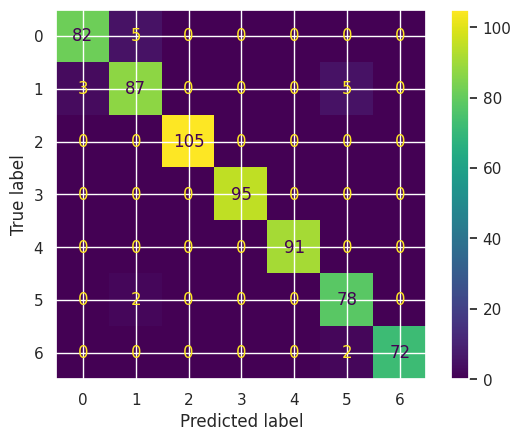

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}\n")
print("__________________________________________________\n")  
print(f"classification_report : \n{classification_report(y_test,y_pred)}\n")      
print("__________________________________________________\n")          
cm = confusion_matrix(y_test,y_pred) 
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1, 2,3,4,5,6]) 
  
cm_display.plot() 
plt.show() 

# **Thanks**